# DATA ANALYSIS AND EXPLORATION MINI-PROJECT: 

# An approach to analysing risk in football


![title](risk-everything.jpeg)

This report is, for the most part, an assumption-generated analysis on the accuracy of predictions in football. We would like to evaluate the confidence with which predictions in football can be made, and use conditions that may lead to more refined judgements and predictions about a team or player's performance.

# Aim

The goal of these exercises is to help any supporter (hopefully) make informed decisions before placing any stake in a team. Despite how naive some of the tests may may seem, the idea is to understand the aspects of the game are partially predictable, and which are as good as rolling a die and hoping for the best outcome. In this way, the analyses of this report may help evaluate a decision to support a player or club.

## Datasets

4 datasets will be used:

The first two are identical:
* Dataset 1 will be used for the main analysis
* Dataset 2 will be used to produce geographical plots
* Dataset 3 is used to make a t-test camparison against the first one
* Dataset 4 will be used to create a visual record for the performance of a team

The reason the first two datasets were chosen is because they the most current, complete and accurate datasets containing the attributes of professional footballers. Dataset 4 was verified against other sources that give the same information 


## Using this notebook:

To avoid inconsistent results,
* Run all cells in sequence
* Run all cells once

The report is split into two chapters:


## Chapter 1

We would like to devise a confidence measure of sorts for an average-rate footballer becoming world-class. That is, we explore the characteristics of a good footballer to determine whether a given player will reach a certain level of greatness. Of course, instead of basing a hypothesis on a thorough study, one could simply determine the likelihood of success based on the frequency of successes of former young aspirants, which would render this study void. 
But, this analysis is revealed useful since we tailor a hypothesis that can be used for any player, with the disclaimer that football, like any other career, is not one whose model perfectly represents each subject. This gives rise to some very key simplifying assumptions:

* The data used is at least a rough representation of reality
* The team for which a subject plays is immaterial to his predicted outcome (how good they will be)

This chapter takes the form of a narrated simulation. A series of tests will be run that will help Dr. Asdfg evaluate his chances of making it as a world-class footballer. For simplicity, Dr. Asdfg will take the attributes of a random player in this dataset.

Note that his circumstances may be customised (tweaked using the functions created) based on the level of skill (defined as 'overall' throughout the study) which Dr. Asdfg thinks he posesses. Albeit, all analyses done in this study are based on default values already set by the researcher. **Thus, if these parameters are changed, analyses may not make sense.**
Another key assumption made is that the only this dataset shapes Dr.Asdfg's likelihood of success and no other external factors play a role in determining his success, unless otherwise stated.

Datasets used: Datasets 1 to 3

### Chapter 1's contribution to the goal:

The factors that a player considers when choosing a team provide insight to a prediction that allows the predictor what attributes to consider when placing any sort of stake in a player.

We will answer the main question by ansewring the following question: 

**How much evidence can we propegate to place confidence in a player at the beginning of his career?**


## Chapter 2

Part 2 is a study on team performance over time. Forecasts will be made to project the expected trajectory of team performances over the following season (foootball calendar year).

Datasets used: Datasets 4

### Chapter 2's controbution to the goal:

A team's performance in previous seasons is the best metric for future performance. Chapter 2 hopes to achieve a summary of this metric; and aid a predictor in 

We will answer the main question by answring the following question: 

**What arguments can be developed for the endorsement of a team?**


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('darkgrid')
import scipy.stats as scs
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from pandas.plotting import bootstrap_plot
import scipy
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
pd.set_option('display.max_columns', None)


## CHAPTER 1: PLAYER-TEAM ANALYSIS
---

This Chapter, will fit Dr. Asdfg to a team and conduct some tests that evaluate his impact on a team, and what factors to consider when choosing a team.

## PART 1.1 

## Section 1.1.1: Data Preparation - Dataset 1

First we read the data, remove unnecessary columns and view the first five rows using Pandas.

#### Source: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset/data

In [2]:
fifa2 = pd.read_csv('DATASETS/fifa-18-demo-player-dataset/CompleteDataset.csv', usecols = ['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'])
display(fifa2.shape)
display(fifa2.columns)
display(fifa2.head())
fifa2.tail()

C:\Users\bseot\Anaconda3\envs\education1\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(17981, 71)

Index(['Unnamed: 0', 'Name', 'Age', 'Nationality', 'Overall', 'Potential',
       'Club', 'Value', 'Wage', 'Special', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys', 'CAM',
       'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM',
       'LS', 'LW', 'LWB', 'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
17976,17976,A. Kelsey,17,England,46,63,Scunthorpe United,€50K,€1K,755,24,16,38,26,12,23,14,13,12,5,12,46,47,49,42,48,10,9,31,21,7,9,17,6,40,19,19,10,32,28,11,50,26,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17977,17977,B. Richardson,47,England,46,46,Wycombe Wanderers,€0,€1K,832,25,44,35,44,22,44,11,12,11,11,11,39,50,39,50,37,12,16,51,13,16,14,22,13,51,12,13,13,25,32,12,47,17,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17978,17978,J. Young,17,Scotland,46,61,Swindon Town,€60K,€1K,1194,66,26,60,77,41,50,28,32,37,47,25,11,15,12,12,11,47,16,73,30,51,18,58,46,54,42,42,14,51,33,17,32,37,33,44.0,28.0,29.0,45.0,38.0,44.0,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,ST,44.0,31.0,28.0,38.0,29.0,45.0,42.0,45.0,44.0,32.0,45.0
17979,17979,J. Lundstram,18,England,46,64,Crewe Alexandra,€60K,€1K,1302,57,46,58,74,43,45,34,30,41,32,34,10,13,7,8,9,40,46,56,44,32,43,43,37,49,49,43,47,58,49,48,46,51,25,45.0,46.0,47.0,43.0,45.0,45.0,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,CM,45.0,47.0,46.0,45.0,47.0,43.0,45.0,41.0,44.0,46.0,41.0
17980,17980,L. Sackey,18,Ghana,46,64,Scunthorpe United,€50K,€1K,1031,48,52,49,47,32,33,19,17,23,20,17,15,8,10,10,7,48,38,60,24,17,38,21,20,40,31,21,43,49,55,44,67,22,19,29.0,45.0,38.0,29.0,30.0,29.0,40.0,45.0,30.0,38.0,29.0,30.0,31.0,29.0,38.0,ST CB,29.0,40.0,45.0,30.0,38.0,29.0,30.0,31.0,29.0,38.0,31.0


Let's make this dataset a little more workable by converting to floats the strings that contain numerical values.

In [3]:
fifa2.dtypes;

In [4]:
fifa2[['Acceleration','Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']] = fifa2[['Acceleration','Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']].apply(pd.to_numeric, errors = 'coerce')


In [5]:
fifa2['Wage'] = fifa2['Wage'].str[1:-1]
fifa2['Wage'] = pd.to_numeric(fifa2['Wage'], errors = 'coerce')

In [6]:
fifa2['Value'] = fifa2['Value'].str[1:-1]
fifa2['Value'] = pd.to_numeric(fifa2['Value'], errors = 'coerce')


To make the dataset more legible, we'll the 'Preferred Positions', 'Sprint Speed' and 'Stamina' columns near the beginning of the dataframe since it is quite relevant with respect to the columns in the beginning of the dataframe. Then concert the 'Preferred_Positions' column to string datatype. Also, working with the index column may be tough, so we rename the 'Unnamed: 0' column to something that suits better its purpose: 'Index0'

##### (Please run the below cell only once per session )

In [7]:
fifa2.insert(10, 'Preferred_Position', fifa2['Preferred Positions'], allow_duplicates=False)
del fifa2['Preferred Positions']

fifa2.insert(12, 'Sprint_Speed', fifa2['Sprint speed'], allow_duplicates=False)
del fifa2['Sprint speed']

Stamina = fifa2['Stamina'].copy()
del fifa2['Stamina']
fifa2.insert(13, 'Stamina', Stamina, allow_duplicates=False)

fifa2['Preferred_Position'].to_string() #len(fifa2.Preferred_Position[8])
fifa2['Preferred_Position'] = fifa2['Preferred_Position'].str[:2]
fifa2.head()

fifa2.insert(0, 'Index0', fifa2['Unnamed: 0'], allow_duplicates=False)
del fifa2['Unnamed: 0']

fifa2.head()

,Index0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Position,Acceleration,Sprint_Speed,Stamina,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95.5,565.0,2228,ST,89.0,91.0,92.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,76.0,7.0,11.0,15.0,14.0,11.0,88.0,29.0,95.0,77.0,92.0,22.0,85.0,95.0,96.0,83.0,94.0,23.0,31.0,80.0,85.0,88.0,89.0,53.0,62.0,91.0,82.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,105.0,565.0,2154,RW,92.0,87.0,73.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,90.0,6.0,11.0,15.0,14.0,8.0,71.0,22.0,68.0,87.0,88.0,13.0,74.0,93.0,95.0,88.0,85.0,26.0,28.0,59.0,90.0,85.0,92.0,45.0,59.0,92.0,84.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123.0,280.0,2100,LW,94.0,90.0,78.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,84.0,9.0,9.0,15.0,15.0,11.0,62.0,36.0,61.0,75.0,77.0,21.0,81.0,90.0,88.0,81.0,80.0,33.0,24.0,53.0,80.0,83.0,88.0,46.0,59.0,88.0,79.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97.0,510.0,2291,ST,88.0,77.0,89.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,84.0,27.0,25.0,31.0,33.0,37.0,77.0,41.0,69.0,64.0,86.0,30.0,85.0,92.0,93.0,83.0,87.0,38.0,45.0,80.0,84.0,88.0,87.0,58.0,65.0,88.0,80.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61.0,230.0,1493,GK,58.0,61.0,44.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,11.0,91.0,90.0,95.0,91.0,89.0,25.0,30.0,78.0,59.0,16.0,10.0,47.0,12.0,85.0,55.0,25.0,11.0,10.0,83.0,70.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### (Please run the below cell only once per session )

In [8]:
ones = pd.Series(np.ones(fifa2.shape[0]))
fifa2 = pd.concat([fifa2, ones], axis = 1)
fifa2.rename(index = str, columns = {0: 'count'}, inplace = True)
fifa2.head()


,Index0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred_Position,Acceleration,Sprint_Speed,Stamina,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,count
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95.5,565.0,2228,ST,89.0,91.0,92.0,63.0,89.0,63.0,93.0,95.0,85.0,81.0,91.0,94.0,76.0,7.0,11.0,15.0,14.0,11.0,88.0,29.0,95.0,77.0,92.0,22.0,85.0,95.0,96.0,83.0,94.0,23.0,31.0,80.0,85.0,88.0,89.0,53.0,62.0,91.0,82.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,1.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,105.0,565.0,2154,RW,92.0,87.0,73.0,48.0,90.0,95.0,95.0,96.0,77.0,89.0,97.0,95.0,90.0,6.0,11.0,15.0,14.0,8.0,71.0,22.0,68.0,87.0,88.0,13.0,74.0,93.0,95.0,88.0,85.0,26.0,28.0,59.0,90.0,85.0,92.0,45.0,59.0,92.0,84.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,1.0
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123.0,280.0,2100,LW,94.0,90.0,78.0,56.0,96.0,82.0,95.0,92.0,75.0,81.0,96.0,89.0,84.0,9.0,9.0,15.0,15.0,11.0,62.0,36.0,61.0,75.0,77.0,21.0,81.0,90.0,88.0,81.0,80.0,33.0,24.0,53.0,80.0,83.0,88.0,46.0,59.0,88.0,79.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,1.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97.0,510.0,2291,ST,88.0,77.0,89.0,78.0,86.0,60.0,91.0,83.0,77.0,86.0,86.0,94.0,84.0,27.0,25.0,31.0,33.0,37.0,77.0,41.0,69.0,64.0,86.0,30.0,85.0,92.0,93.0,83.0,87.0,38.0,45.0,80.0,84.0,88.0,87.0,58.0,65.0,88.0,80.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,1.0
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61.0,230.0,1493,GK,58.0,61.0,44.0,29.0,52.0,35.0,48.0,70.0,15.0,14.0,30.0,13.0,11.0,91.0,90.0,95.0,91.0,89.0,25.0,30.0,78.0,59.0,16.0,10.0,47.0,12.0,85.0,55.0,25.0,11.0,10.0,83.0,70.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## Section 1.1.2: Data Preparation - Dataset 2

A dataset containing the players with some extra feature variables may make for more interesting analyses. 


We continue with a dataset that is not squeaky clean either and go through the tedious process again...

#### Source: https://www.kaggle.com/kevinmh/fifa-18-more-complete-player-dataset/data

In [9]:
#Load Dataset
fifa = pd.read_csv('DATASETS/FIFA18/fifa-18-more-complete-player-dataset/complete.csv')

del fifa['club_logo']
del fifa['body_type']
del fifa['real_face']
del fifa['flag']
del fifa['photo']

fifa['eur_value'] = fifa['eur_value'] / 1000000
fifa['eur_wage'] = fifa['eur_wage'] / 1000
fifa['eur_release_clause'] = fifa['eur_release_clause'] / 1000000

overall = fifa['overall'].copy()
del fifa['overall']
fifa.insert(11, 'overall1', overall, allow_duplicates = False)

potential = fifa['potential'].copy()
fifa.insert(12, 'potential1', potential, allow_duplicates = False)
del fifa['potential']

ones1 = pd.Series(np.ones(fifa.shape[0]))
fifa = pd.concat([fifa, ones1], axis = 1)
fifa.rename(index = str, columns = {'overall1': 'overall', 'potential1': 'potential' , 'eur_wage': 'euro_wage(M)','eur_value': 'euro_value(M)', 'eur_release_clause': 'eur_release_clause(M)', 0: 'count' }, inplace = True)
fifa.head()

,ID,name,full_name,club,special,age,league,birth_date,height_cm,weight_kg,nationality,overall,potential,euro_value(M),euro_wage(M),eur_release_clause(M),pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,count
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,Portugal,94,94,95.5,565.0,195.8,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0
1,158023,L. Messi,Lionel Messi,FC Barcelona,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Argentina,93,93,105.0,565.0,215.3,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,

## PART 1.2: DATA ASSESSMENT

## Section 1.2.1: Player Assignment

After a careful consideration of his life choices, Dr.Asdfg thinks that he stands a fair chance at becoming a professional footballer

We will assign attribute values to Dr. Asdfg that are sampled from players aged 18 to 23 and have an overall rating in the 35th percentile, to make results clear.

Dr. Asdfg.To understand his place in the world of football, we consider at the average potential ratings of players and attribute his abilities by specifying his parameters below: 

Age range:
* age_low: 18
* age_high: 23

    and

Quantile: 35

1) Most players like Dr.Asdfg, at the start of their career, are aged 18 to 23. 
2) Dr. Asdfg's career is in its infancy; so his ability rating will be sampled from the 35th percentile of all the data. 

We will reveal that statement 1 implies that younger players are not as good as their older competition.


In [10]:
class Player:
    age_low = 18
    age_high = 23 
    quantile = .35

    def __init__(self, age_low = age_low, age_high = age_high, quantile = quantile):
        fifa_age = fifa['age'].between(age_low, age_high, inclusive = True)
        fifa_age = fifa[fifa_age].copy()
        self.fifa_age = fifa_age
        self.quantile = quantile
        fifa_age_potential = fifa_age['overall']
        self.fifa_age_potential = fifa_age_potential
        fifa_age_quantile = fifa_age_potential.between(fifa_age.quantile(quantile)['overall'], 100, inclusive = True)
        age_quantile_df = fifa_age[fifa_age_quantile]
        self.age_quantile_df = age_quantile_df
        player = age_quantile_df.sample(1)
        you = player.copy()
        self.you = you
    
    def you(self):
        return self.you
    
    def potential_df(self, quantile):
        return self.fifa_age_potential
    
    def age(self):
        return self.fifa_age
    
    def age_quant(self):
        return self.age_quantile_df


potential_df = Player()

In [11]:
dr_Asdfg = Player()
random_test = dr_Asdfg.you

display(random_test)

,ID,name,full_name,club,special,age,league,birth_date,height_cm,weight_kg,nationality,overall,potential,euro_value(M),euro_wage(M),eur_release_clause(M),pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,count
12625,208573,M. Dyngeland,Mathias Dyngeland,Sogndal,1067,21,Norwegian Eliteserien,1995-10-07,187.0,81.0,Norway,63,72,0.425,1.0,0.616,65,62,57,64,41,60,1,1,3,Medium,Medium,Right,16,13,14,31,15,16,14,14,24,22,41,41,34,60,55,24,54,36,59,13,22,17,14,35,25,28,17,17,16,65,62,57,60,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1.0


The random simulator works fine. 

In [12]:
dr_Asdfg = pd.DataFrame(fifa.iloc[7748]).transpose()
dr_Asdfg = dr_Asdfg.replace(dr_Asdfg.name.iloc[0], 'Dr.Asdfg', regex = True)
dr_Asdfg = dr_Asdfg.replace(dr_Asdfg.full_name.iloc[0], 'GREATEST OF ALL TIME', regex = True)

display(dr_Asdfg)

,ID,name,full_name,club,special,age,league,birth_date,height_cm,weight_kg,nationality,overall,potential,euro_value(M),euro_wage(M),eur_release_clause(M),pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,count
7748,239627,Dr.Asdfg,GREATEST OF ALL TIME,1. FC Nürnberg,1598,23,German 2. Bundesliga,1994-05-05,183.0,79.0,Slovakia,67,76,1.2,8.0,2.1,76,65,43,59,29,72,1,3,4,Medium,Medium,Left,38,65,73,47,69,57,45,41,39,62,73,79,65,56,60,70,67,63,77,57,71,25,68,43,68,58,24,26,19,13,14,7,10,7,66.0,59.0,61.0,56.0,50.0,57.0,42.0,44.0,43.0,44.0,66.0,59.0,61.0,56.0,50.0,57.0,42.0,44.0,43.0,44.0,66.0,61.0,56.0,50.0,42.0,44.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0


Dr Asdfg has been fixed a randomly sampled player from a subset of the purple one showing all players aged 18 to 26. Subsetting from the lower (left) tail of the distribution is done for demonstration purposes because the results are clearer.
The fixation done to simplify the analysis.

We analyse some features about club data that may be of interest to 

As a matter of interest, let us test if our chosen random subset of players aged 18 to 25 (generated in 'Class Player') follows a normal distribution as per assumption.  We start by drawing their plots an their kernel density estimation (kde).

The plots below are the probability distribution plot of the *population*, 'fifa' and the *subset of players 18 to 25*, 'fifa_age_potential'.

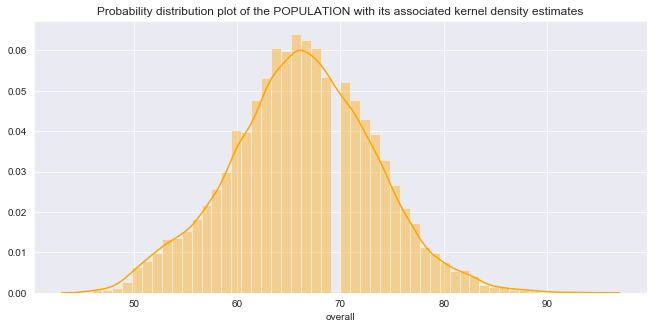

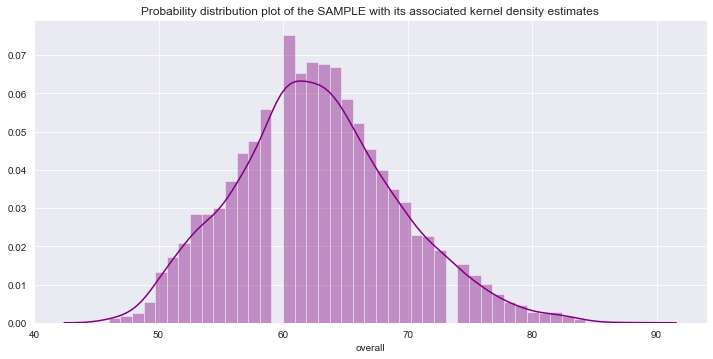

In [13]:
fig, ax = plt.subplots(figsize = (11, 5))
ax.set_title('Probability distribution plot of the POPULATION with its associated kernel density estimates')
fig, ax1 = plt.subplots(figsize = (11, 5))
ax1.set_title('Probability distribution plot of the SAMPLE with its associated kernel density estimates')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=1,
                    wspace=0.35)

#Population
sns.distplot(fifa['overall'], ax = ax, color = 'orange')

#Sample

sns.distplot(potential_df.potential_df(0.35), ax = ax1, color = 'purple')
plt.show()

## Section 1.2.2: t-test

To confirm our hypothesis, we use a t-test for difference of means. Our null hypothesis is that the means of the above two distributions are the same at a level of signifiance given by a probability value (p-value) calculated by the function . A p-value below *five* percent is low enough to accept. We can afford such a large burden of proof since the stakes of our outcome is not that significant (I mean, we're only talking about your entire football career).

First, check the summary statistics of both distributions.

In [14]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# source of above function: 
# https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

display_side_by_side(pd.DataFrame(fifa['overall'].describe()), pd.DataFrame(potential_df.potential_df(.35).describe()))

,overall
count,17994.000000
mean,66.253029
std,6.946729
min,46.000000
25%,62.000000
50%,66.000000
75%,71.000000
max,94.000000
,overall
count,7016.000000


To use the *scipt.stats.ttest_1samp* function, we must check if the two sets have equal population variances. 

The standard deviations are very different; which suggests that the variance will be too. But we confirm this

In [15]:
display(fifa['overall'].describe().loc['std']**2)
display(potential_df.potential_df(.35).describe().loc['std']**2)

48.25704217924128

43.78635207906823

In [16]:
scs.ttest_ind_from_stats(mean1 = potential_df.potential_df(.35).describe()['mean'] , std1 = potential_df.potential_df(.35).describe()['std'], nobs1 = potential_df.potential_df(.35).describe()['count'], mean2 = fifa['overall'].describe()['mean'], std2 = fifa['overall'].describe()['std'], nobs2 = fifa['overall'].describe()['count'], equal_var=True)

Ttest_indResult(statistic=-36.72611120622259, pvalue=1.2128127164254047e-287)

We compute the absolute difference between the means, followed by the proportion of the difference between the means as a percentage of the population mean :

In [17]:
display(fifa['overall'].describe()['mean']- potential_df.potential_df(.35).describe()['mean'])
display(((fifa['overall'].describe()['mean'] - potential_df.potential_df(.35).describe()['mean']) / fifa['overall'].describe()['mean'] )*100)

3.543935286803439

5.34909173462397

Below, we will plot a graph that shows the closeness of fit of a distribution to a normal one.

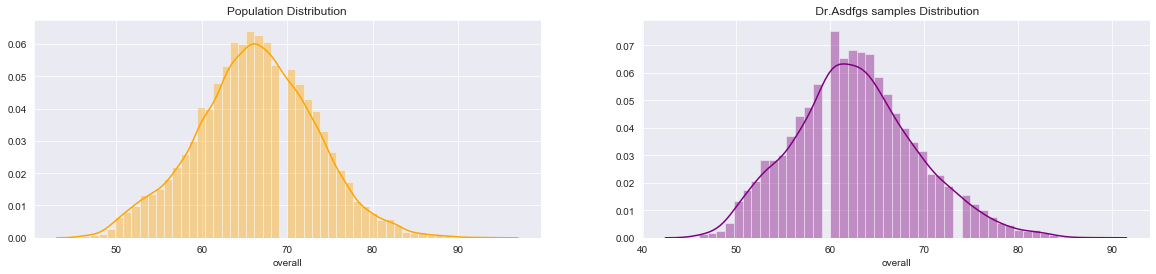

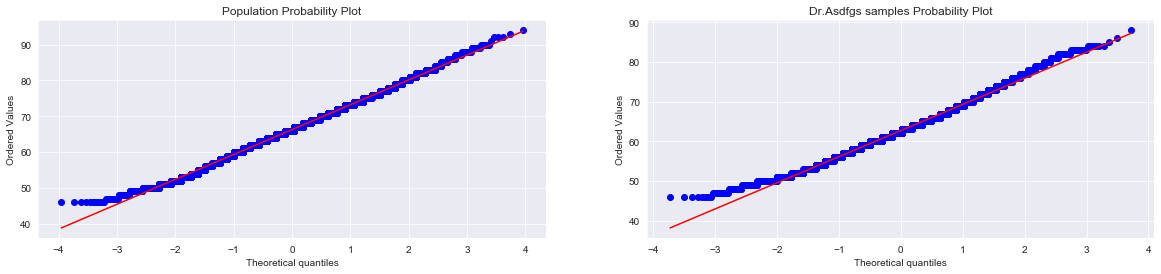

In [18]:
fig, ax1 = plt.subplots(1, 2, figsize = (20, 4))

sns.distplot(fifa['overall'], ax = ax1[0], color = 'orange')
ax1[0].set_title('Population Distribution')
sns.distplot(potential_df.potential_df(0.35), ax = ax1[1], color = 'purple')
ax1[1].set_title(' Dr.Asdfgs samples Distribution')

fig, ax = plt.subplots(1, 2, figsize = (20, 4))

scipy.stats.probplot(fifa['overall'], sparams=(), dist='norm', fit=True, plot=ax[0])
ax[0].set_title('Population Probability Plot')
scipy.stats.probplot(potential_df.potential_df(0.35), sparams=(), dist='norm', fit=True, plot=ax[1])
ax[1].set_title('Dr.Asdfgs samples Probability Plot')
plt.show()

### t-test interpretation:

Refer to the above plots:
The two plots on the left pertain to the ENTIRE dataset (what we chose to call the Population)
The two plots on the right pertain to the sample data (the sample from which Dr. Asdfg is taken)

By inspection, it is not difficult to see that the sample from  which Dr. Asdfg will be considered (purple dustribution) is satisfactorily different from the population sample, which looks closer to a normal distribution, while the purple probability distribution is more skewed to the right. Also note that the mean is closer to the median for the orange distribution. 
Looking at the visual tests for normality for the Population Distribution and the Dr. Asdfg's sample (bottom two), we draw the following a priori analyses:

The test for normality thus suggests that the population plot is closer to normal for most of the data(the tails of the data distort its normality).

Also, note the variance in the dataset. 

* The orange population plot has a higher variance (or standard deviation of 6.946729) - see summary above
 
* The purple sample plot has a lower variance (or standard deviation of 6.617126) - see summary above

* The above two observations are confirmed by the fact that the 'Theoretical Quantiles' spanned by the orange distribution (spanning 8 quantiles) are less than those of the purple distribution (spanning fewer than 8 quantiles). We would expect the variance of the normal-looking (orange) distribution to be lower, but this is not the case. Despite this the population probability plot's values follow the red line (normal) more closely than the sample probability plot does.




## Finally:
This gives rise to our results of the t test:

The very low p value  tells us that the test is significant, as is also confirmed by the high t value .

That is, we can reject the null hypothesis that the mean 'overall' rating of the two distriutions are equal,at an exact level of significance that is almost zero, of $1.2128127164490003e-287$. 

Confirming the difference between the sample means: 

$66.253029 - 62.709094 $, 
returns a value of $3.543935286803439$ . This is quite a large difference, given that it is $3.543935286803439  / 66.253029 - 62.709094 $ of the larger (population) 'overall' rating.

Note that differences between these means, is insignificant with low p-values. This is likely, since the sample sizes are very large, with more than 4 000 players for the smaller sample and 17 000 players in the entire dataset.

This  in this test is very low. For purposes of the analysis in this report, 0.05 is a low enough burden of proof. We may manually compute the t stat using a level of significance of 0.05 and a [t-table](http://www.sthda.com/english/wiki/t-distribution-table), and obtain will get a significant test of similar means at a much higher level of significance. 

The result of the t-test help us understand the nature of the distribution:

With a sample mean that is statistically, and possibly even practically different, Dr. Asdfg will be sampled from a set that has poorer attributes. In other words, we may hypothesize that a player aged 18 - 23 is not likely to perform as well as his older counterparts. To create hope, though, we will run through some tests that Dr. Asdfg may want to consider before going pro.

## Side Section 1.2.3: t-test for difference in means with independent, identically distributed sample

An independently sampled data set, sampled a year earlier, with different players will be involved to gain confidence that our analyses are credible and are time-invariant (that is, our comparisons are repeatable even with future datasets).

#### Source: https://www.kaggle.com/rovilayjnr/fifa-17-datasets/data

In [19]:
fifa3 = pd.read_csv('DATASETS/FIFA17/FullData.csv')
fifa3.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,7/1/2009,2021.0,94,185 cm,80 kg,Right,2/5/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,7/1/2004,2018.0,93,170 cm,72 kg,Left,6/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,7/1/2013,2021.0,92,174 cm,68 kg,Right,2/5/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,7/11/2014,2021.0,92,182 cm,85 kg,Right,1/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,7/1/2011,2021.0,92,193 cm,92 kg,Right,3/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89


In [20]:
fifa3 = fifa3['Rating']

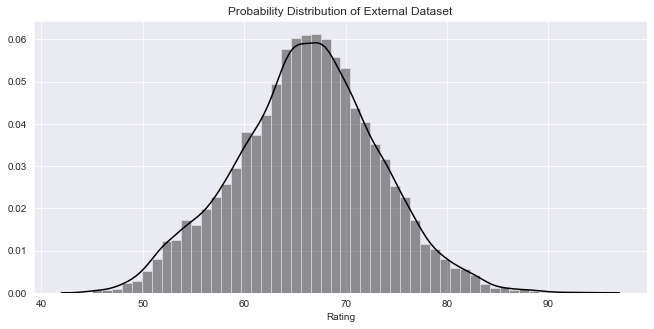

In [21]:
fig, ax = plt.subplots(figsize = (11, 5))
ax.set_title('Probability Distribution of External Dataset')
sns.distplot(fifa3, ax = ax, color = 'black')
plt.show()

In [22]:
display(fifa3.mean())
fifa['overall'].mean()

66.16619285876735

66.25302878737357

This distribution looks normal, as do the previous ones. The same test of significance could be done

In [23]:
scs.ttest_ind_from_stats(mean1 = fifa['overall'].describe()['mean'], std1 = fifa['overall'].describe()['std'], nobs1 = fifa['overall'].describe()['count'], mean2 = fifa3.describe()['mean'], std2 = fifa3.describe()['std'], nobs2 = fifa3.describe()['count'], equal_var=True)

Ttest_indResult(statistic=1.1675200862442439, pvalue=0.24300822541784464)

### t-test interpretation:

From the summary above, we notice that the mean of this and the 'fifa' datasets are painfully close to its median. That's one attribute of a normal distribution.

The test produces an extremely large probability of a type 1 error here: $0.24300822541783434$, and 

We take this to mean that the means are so similar that we CANNOT reject the null hypothesis of similar means.

Between the t-test in Section 1.2.2 and the one done here, the difference is that the former had sample mean taken from a different distribution and were not independently sampled. The latter's t test had similar distributions and yielded a result that the means are not significantly different, as expected.

## Section 1.2.2: Player Positions

The contribution of this section to the goal of this test is to evaluate the position Dr. Asdfg ought to play. It is safe to assume that his decision will influence his performance in the game, based on his strengths.


In [24]:
position_df = fifa2.groupby('Preferred_Position').sum()
position_df = pd.DataFrame(position_df['count'])
position_df['count'] = position_df['count'] / position_df['count'].sum()

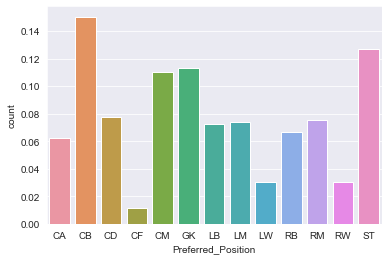

In [25]:
sns.set_style("darkgrid")
ax = sns.barplot(x=position_df.index, y="count", data=position_df)
plt.show()

The data above has been normalised so that the sum of frequencies in the barplot add up to 1. A preliminary summary of your best odds is given by order of least occupied to most occupied position below:

In [26]:
position_df.sort_values('count')

,count
Preferred_Position,
CF,0.011401
RW,0.030032
LW,0.030421
CA,0.062566
RB,0.066459
LB,0.072799
LM,0.073745
RM,0.075079
CD,0.077638


It looks like Dr. Asdfg may want to go for Centre Forward (CF), Right wing (RW), or Left Wing (LW) for Dr.Asdfg to stand a good chance of playing in a squad. Dr. Asdfg's highest rating is in ST , which is the most congested position overall. His ST raring is qual to his RW score. He would either have to fight his way into a squad at the ST position or make a move onto the Right or Left Wing positions. This should't be a difficult ask, since these are his first and second best positions:

In [27]:
display(dr_Asdfg.loc[:,'rs':'lcb'])

,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb
7748,66.0,59.0,61.0,56.0,50.0,57.0,42.0,44.0,43.0,44.0,66.0,59.0,61.0,56.0,50.0,57.0,42.0,44.0,43.0,44.0,66.0,61.0,56.0,50.0,42.0,44.0


## Section 1.2.3: Player-Team Assessment

Finally, you can now compare Dr. Asdfg's attributes with those of other teams.
 
To find which team you could fit in, you think it may be a good idea to compare yourself to players who play for the best, worst, and average-performing clubs to guage your chances of playing competitively. You decide to pick the best 15 players from those three clubs. 

*Your comparison will be based on your **overall** rating vs their **overall** rating.*

##### (Please run the below cell only once per session )

In [28]:
club_df = fifa.groupby('club').mean()
club_df = club_df.sort_values('overall', ascending = True)
# Create club column
club_df['club'] = club_df.index.copy()
club_df.insert(0, 'club1', club_df['club'], allow_duplicates = False)
# Extract club names

club0 = pd.DataFrame(club_df[club_df['overall']==club_df.quantile(0.0).overall])
club50 = pd.DataFrame(club_df[club_df['overall']==club_df.quantile(.5).overall])
club100 = pd.DataFrame(club_df[club_df['overall']==club_df.quantile(1.0).overall])

display(club0)
display(club50)
display(club100)

,club1,ID,special,age,height_cm,weight_kg,overall,potential,euro_value(M),euro_wage(M),eur_release_clause(M),pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,count,club
club,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Galway United,Galway United,220505.24,1359.44,22.0,180.2,73.92,54.08,61.96,0.1162,1.2,0.19,59.84,45.44,47.2,52.64,41.36,53.64,1.0,2.12,2.72,43.08,40.32,43.8,45.88,35.68,46.76,39.24,39.16,41.28,45.84,56.96,58.08,56.56,50.4,59.92,43.68,62.28,52.64,55.36,39.76,45.4,37.12,42.12,43.84,43.36,45.4,36.64,40.0,38.36,14.52,15.12,14.92,15.36,16.0,48.863636,50.136364,49.318182,49.090909,47.454545,50.363636,46.045455,46.318182,47.590909,48.0,48.863636,50.136364,49.318182,49.090909,47.454545,50.363636,46.045455,46.318182,47.590909,48.0,48.863636,49.318182,49.090909,47.454545,46.045455,46.318182,52.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.04,0.04,0.0,0.08,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.12,0.0,0.0,0.2,0.0,0.2,0.04,0.0,0.16,0.08,0.16,0.08,0.16,0.16,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.12,1.0,Galway United


,club1,ID,special,age,height_cm,weight_kg,overall,potential,euro_value(M),euro_wage(M),eur_release_clause(M),pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,count,club
club,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Sporting Lokeren,Sporting Lokeren,205908.535714,1584.107143,24.535714,182.214286,74.714286,66.035714,71.214286,0.951607,6.178571,1.478786,66.892857,53.321429,58.214286,64.214286,47.714286,64.392857,1.0,2.357143,3.321429,51.071429,45.285714,51.642857,58.678571,43.607143,57.071429,43.821429,42.357143,52.75,60.642857,64.428571,63.25,62.607143,63.714286,63.285714,56.285714,62.571429,63.107143,64.071429,44.25,57.857143,44.892857,49.571429,54.428571,49.321429,61.285714,42.75,45.821429,43.214286,16.142857,16.535714,16.428571,16.107143,16.535714,58.48,60.2,59.76,60.0,59.08,60.92,56.6,54.64,56.44,57.48,58.48,60.2,59.76,60.0,59.08,60.92,56.6,54.64,56.44,57.48,58.48,59.76,60.0,59.08,56.6,54.64,65.333333,0.0,0.0,0.0,0.035714,0.035714,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,0.035714,0.0,0.0,0.071429,0.0,0.0,0.035714,0.178571,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.035714,0.107143,0.071429,0.035714,0.0,0.0,0.0,0.071429,0.0,0.0,0.035714,0.035714,0.0,0.0,0.0,0.071429,0.0,0.0,0.035714,0.035714,0.035714,0.178571,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035714,0.0,0.0,0.071429,0.0,0.0,0.0,0.25,0.0,0.0,0.178571,0.0,0.178571,0.035714,0.0,0.214286,0.107143,0.25,0.178571,0.142857,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.107143,1.0,Sporting Lokeren


,club1,ID,special,age,height_cm,weight_kg,overall,potential,euro_value(M),euro_wage(M),eur_release_clause(M),pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,count,club
club,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FC Barcelona,FC Barcelona,183138.0,1962.75,26.333333,179.333333,74.625,82.75,85.875,30.729167,194.666667,64.766667,76.875,71.458333,76.541667,80.0,60.708333,70.875,3.041667,2.958333,3.5,65.291667,62.125,57.208333,75.583333,59.208333,71.625,67.041667,57.625,68.666667,75.916667,73.5,73.0,73.291667,80.958333,71.0,69.5,70.333333,71.916667,67.5,62.833333,62.875,59.916667,67.041667,73.208333,60.541667,74.916667,52.416667,58.083333,55.333333,19.666667,20.083333,20.541667,19.625,19.291667,74.333333,77.380952,77.380952,78.047619,77.095238,77.761905,71.904762,66.761905,70.714286,72.380952,74.333333,77.380952,77.380952,78.047619,77.095238,77.761905,71.904762,66.761905,70.714286,72.380952,74.333333,77.380952,78.047619,77.095238,71.904762,66.761905,78.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.083333,0.041667,0.083333,0.083333,0.0,0.0,0.0,0.0,0.0,0.208333,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.041667,0.041667,0.041667,0.041667,0.041667,0.166667,0.041667,0.0,0.0,0.083333,0.041667,0.0,0.041667,0.166667,0.0,0.0,0.0,0.0,0.083333,0.333333,0.125,0.0,0.208333,0.041667,0.208333,0.083333,0.041667,0.0,0.0,0.041667,0.041667,0.125,0.25,0.0,0.083333,0.0,0.208333,0.0,0.0,0.0,0.166667,0.0,0.0,0.125,0.0,0.125,0.166667,0.041667,0.041667,0.375,0.083333,0.166667,0.125,0.083333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,1.0,FC Barcelona


In [29]:
# Create DataFrames from the three clubs and pick their top 15
team0 = fifa[fifa['club'] == club0.club1[0]][:15]
team50 = fifa[fifa['club'] == club50.club1[0]][:15]
team100 = fifa[fifa['club'] == club100.club1[0]][:15]

display(team0)
display(team50)
display(team100)

,ID,name,full_name,club,special,age,league,birth_date,height_cm,weight_kg,nationality,overall,potential,euro_value(M),euro_wage(M),eur_release_clause(M),pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,count
14345,194791,R. Murray,Ronan Murray,Galway United,1568,25,Rep. Ireland Premier Division,1991-09-12,170.0,70.0,Republic of Ireland,61,64,0.325,1.0,0.528,81,59,49,65,26,49,1,3,3,High,Low,Right,55,61,51,53,55,66,61,65,38,55,82,80,83,57,85,58,81,58,53,51,18,21,63,36,67,55,26,23,22,8,9,8,10,9,60.0,61.0,59.0,57.0,48.0,59.0,38.0,36.0,44.0,46.0,60.0,61.0,59.0,57.0,48.0,59.0,38.0,36.0,44.0,46.0,60.0,59.0,57.0,48.0,38.0,36.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0
14822,207513,G. Holohan,Gavan Holohan,Galway United,1700,25,Rep. Ireland Premier Division,1991-12-15,180.0,75.0,Republic of Ireland,60,65,0.270,1.0,0.439,68,54,59,62,54,54,1,2,3,Medium,Medium,Right,53,52,47,63,51,60,58,58,58,62,63,72,64,54,80,55,86,55,48,59,60,54,53,58,55,52,51,57,56,15,14,6,8,15,56.0,59.0,58.0,59.0,58.0,59.0,57.0,56.0,57.0,57.0,56.0,59.0,58.0,59.0,58.0,59.0,57.0,56.0,57.0,57.0,56.0,58.0,59.0,58.0,57.0,56.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

,ID,name,full_name,club,special,age,league,birth_date,height_cm,weight_kg,nationality,overall,potential,euro_value(M),euro_wage(M),eur_release_clause(M),pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,count
3876,135891,K. Overmeire,Killian Overmeire,Sporting Lokeren,1864,31,Belgian First Division A,1985-12-06,188.0,84.0,Belgium,72,72,2.100,10.0,3.000,72,53,66,62,67,80,1,2,4,Medium,High,Right,62,42,69,70,48,57,50,59,74,71,67,76,62,68,60,75,74,85,81,55,74,74,64,64,48,70,60,69,69,6,10,6,9,6,63.0,63.0,64.0,64.0,68.0,66.0,71.0,70.0,70.0,70.0,63.0,63.0,64.0,64.0,68.0,66.0,71.0,70.0,70.0,70.0,63.0,64.0,64.0,68.0,71.0,70.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,1.0
4011,240899,J. Filipović,Jakov Filipović,Sporting Lokeren,1460,24,Belgian First Division A,1992-10-17,190.0,84.0,Croatia,71,76,2.700,9.0,4.100,67,28,42,43,71,73,1,2,4,High,Medium,Right,31,22,71,56,23,32,24,28,57,54,72,62,55,65,47,42,56,64,77,27,77,73,24,23,33,62,72,71,68,12,14,7,10,11,45.0,42.0,42.0,43.0,49.0,45.0,64.0,70.0,63.0,60.0,45.0,42.0,42.0,43.0,49.0,45.0,64.0,70.0,63.0,60.0,45.0,42.0,43.0,49.0,64.0,70.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

,ID,name,full_name,club,special,age,league,birth_date,height_cm,weight_kg,nationality,overall,potential,euro_value(M),euro_wage(M),eur_release_clause(M),pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,count
1,158023,L. Messi,Lionel Messi,FC Barcelona,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Argentina,93,93,105.0,565.0,215.3,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0
3,176580,L. Suárez,Luis Suárez,FC Barcelona,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,Uruguay,92,92,97.0,510.0,198.9,82,90,79,87,42,81,5,4,4,High,Medium,Right,77,94,77,83,88,86,86,84,64,91,88,77,86,93,60,87,69,89,80,86,78,41,92,84,85,83,30,45,38,27,25,31,33,37,88.0,87.0,88.0,87.0,80.0,85.0,65.0,58.0,64.0,68.0,88.0,87.0,88.0,87.0,80.0,85.0,65.0,58.0,64.0,68.0,88.0,88.0,87.0,80.0,65.0,58.0,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [30]:
team0_with, team50_with, team100_with = pd.concat([team0, dr_Asdfg]), pd.concat([team50, dr_Asdfg]), pd.concat([team100, dr_Asdfg])

display(team0_with, team50_with, team100_with)

,ID,name,full_name,club,special,age,league,birth_date,height_cm,weight_kg,nationality,overall,potential,euro_value(M),euro_wage(M),eur_release_clause(M),pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,count
14345,194791,R. Murray,Ronan Murray,Galway United,1568,25,Rep. Ireland Premier Division,1991-09-12,170.0,70.0,Republic of Ireland,61,64,0.325,1.0,0.528,81,59,49,65,26,49,1,3,3,High,Low,Right,55,61,51,53,55,66,61,65,38,55,82,80,83,57,85,58,81,58,53,51,18,21,63,36,67,55,26,23,22,8,9,8,10,9,60.0,61.0,59.0,57.0,48.0,59.0,38.0,36.0,44.0,46.0,60.0,61.0,59.0,57.0,48.0,59.0,38.0,36.0,44.0,46.0,60.0,59.0,57.0,48.0,38.0,36.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0
14822,207513,G. Holohan,Gavan Holohan,Galway United,1700,25,Rep. Ireland Premier Division,1991-12-15,180.0,75.0,Republic of Ireland,60,65,0.270,1.0,0.439,68,54,59,62,54,54,1,2,3,Medium,Medium,Right,53,52,47,63,51,60,58,58,58,62,63,72,64,54,80,55,86,55,48,59,60,54,53,58,55,52,51,57,56,15,14,6,8,15,56.0,59.0,58.0,59.0,58.0,59.0,57.0,56.0,57.0,57.0,56.0,59.0,58.0,59.0,58.0,59.0,57.0,56.0,57.0,57.0,56.0,58.0,59.0,58.0,57.0,56.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

,ID,name,full_name,club,special,age,league,birth_date,height_cm,weight_kg,nationality,overall,potential,euro_value(M),euro_wage(M),eur_release_clause(M),pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,count
3876,135891,K. Overmeire,Killian Overmeire,Sporting Lokeren,1864,31,Belgian First Division A,1985-12-06,188.0,84.0,Belgium,72,72,2.100,10.0,3.000,72,53,66,62,67,80,1,2,4,Medium,High,Right,62,42,69,70,48,57,50,59,74,71,67,76,62,68,60,75,74,85,81,55,74,74,64,64,48,70,60,69,69,6,10,6,9,6,63.0,63.0,64.0,64.0,68.0,66.0,71.0,70.0,70.0,70.0,63.0,63.0,64.0,64.0,68.0,66.0,71.0,70.0,70.0,70.0,63.0,64.0,64.0,68.0,71.0,70.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,1.0
4011,240899,J. Filipović,Jakov Filipović,Sporting Lokeren,1460,24,Belgian First Division A,1992-10-17,190.0,84.0,Croatia,71,76,2.700,9.0,4.100,67,28,42,43,71,73,1,2,4,High,Medium,Right,31,22,71,56,23,32,24,28,57,54,72,62,55,65,47,42,56,64,77,27,77,73,24,23,33,62,72,71,68,12,14,7,10,11,45.0,42.0,42.0,43.0,49.0,45.0,64.0,70.0,63.0,60.0,45.0,42.0,42.0,43.0,49.0,45.0,64.0,70.0,63.0,60.0,45.0,42.0,43.0,49.0,64.0,70.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

,ID,name,full_name,club,special,age,league,birth_date,height_cm,weight_kg,nationality,overall,potential,euro_value(M),euro_wage(M),eur_release_clause(M),pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,count
1,158023,L. Messi,Lionel Messi,FC Barcelona,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Argentina,93,93,105.0,565.0,215.3,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,91.0,92.0,92.0,84.0,90.0,59.0,45.0,57.0,62.0,88.0,92.0,92.0,84.0,59.0,45.0,NaN,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1.0
3,176580,L. Suárez,Luis Suárez,FC Barcelona,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,Uruguay,92,92,97.0,510.0,198.9,82,90,79,87,42,81,5,4,4,High,Medium,Right,77,94,77,83,88,86,86,84,64,91,88,77,86,93,60,87,69,89,80,86,78,41,92,84,85,83,30,45,38,27,25,31,33,37,88.0,87.0,88.0,87.0,80.0,85.0,65.0,58.0,64.0,68.0,88.0,87.0,88.0,87.0,80.0,85.0,65.0,58.0,64.0,68.0,88.0,88.0,87.0,80.0,65.0,58.0,NaN,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

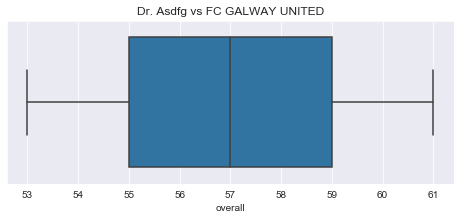

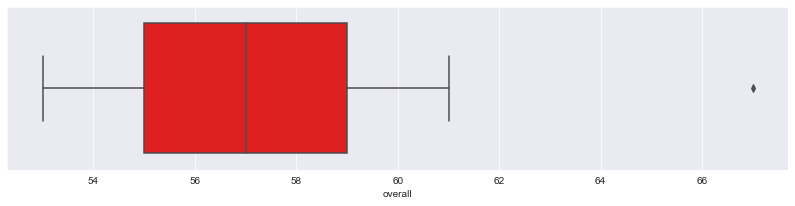

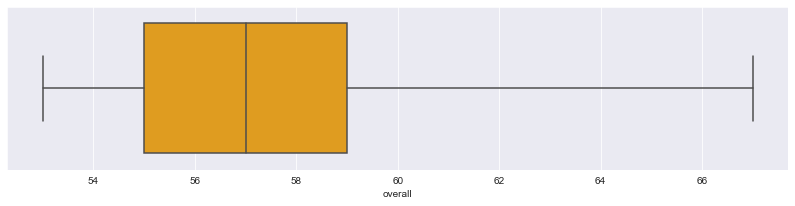

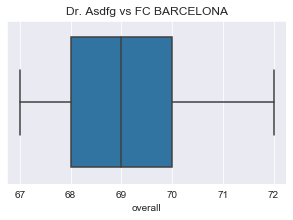

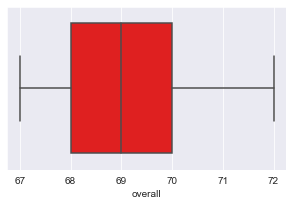

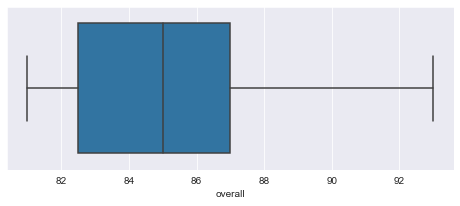

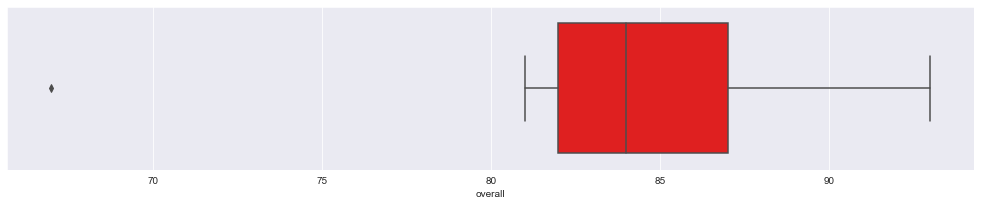

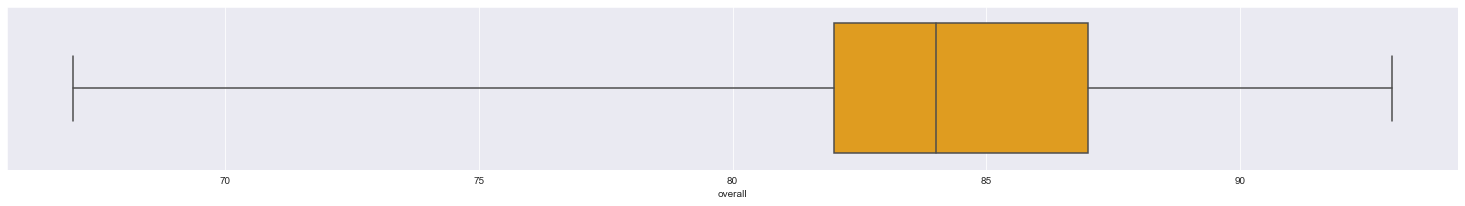

In [31]:
#set proportional axis sizes

team0_scale = team0.overall.max() - team0.overall.min()
team0_with_scale = team0_with.overall.max() - team0_with.overall.min()

team50_scale = team50.overall.max() - team50.overall.min()
team50_with_scale = team50_with.overall.max() - team50_with.overall.min()

team100_scale = team100.overall.max() - team100.overall.min()
team100_with_scale = team100_with.overall.max() - team100_with.overall.min()

sns.set_style("darkgrid")


fig, ax1 = plt.subplots(figsize = (team0_scale, 3))
sns.boxplot(None, team0['overall'], team0, orient = 'h', ax = ax1)
ax1.set_title('Dr. Asdfg vs FC GALWAY UNITED')
fig, ax2 = plt.subplots(figsize = (team0_with_scale, 3))
sns.boxplot(None, team0_with['overall'], team0_with, orient = 'h', color = 'r', ax = ax2)
fig, ax7 = plt.subplots(figsize = (team0_with_scale, 3))
sns.boxplot(None, team0_with['overall'], team0_with, orient = 'h', color = 'orange', ax = ax7, whis = 3)

fig, ax3 = plt.subplots(figsize = (team50_scale, 3))
ax3.set_title('Dr. Asdfg vs SPORTING LOKEREN')
sns.boxplot(None, team50['overall'], team50, orient = 'h', ax = ax3)
fig, ax4 = plt.subplots(figsize = (team50_with_scale, 3))
sns.boxplot(None, team50_with['overall'], team50_with, orient = 'h', color = 'r', ax = ax4)



fig, ax5 = plt.subplots(figsize = (team100_scale/1.5, 3))
sns.boxplot(None, team100['overall'], team100, orient = 'h', ax = ax5)
ax3.set_title('Dr. Asdfg vs FC BARCELONA')
fig, ax6 = plt.subplots(figsize = (team100_with_scale/1.5, 3))
sns.boxplot(None, team100_with['overall'], team100_with, orient = 'h', color = 'r', ax = ax6)

fig, ax7 = plt.subplots(figsize = (team100_with_scale, 3))
sns.boxplot(None, team100_with['overall'], team100_with, orient = 'h', color = 'orange', ax = ax7, whis = 3)
plt.show()

## Interpretation

Dr. Asdfg's best chance of malking it to the big leagues is by playing for either:

* The worst team in the universe, Galway United, where he will outshine everyone as an upper outlier
* The average performing team Sporting Lokeren, where he would be able to blend in niely with the rest of the squd and maybe break the starting lineup
* The best team in the entire world, Fc Barcelona, where he is unlikely to make even the bench if, by any chance, he gets scouted. He is, by far, a lower outlier

Dr. Asdfg can consider whether he can make his National squad. 

In [32]:
dr_Asdfg.overall

7748    67
Name: overall, dtype: int64

In [33]:
fifa2.groupby('Nationality').mean().sort_values('Overall', ascending = False).loc[dr_Asdfg.nationality,:].Overall

Nationality
Slovakia    66.75
Name: Overall, dtype: float64

Given his tender age, he should consider trials if his overall score is above the team average

It's been a long journey. Dr.Asdfg is adamant that he can make it as a professional footballer. As one of the last steps to  his preparation, he must consider his skill set. 

In [34]:
fifa2_outfield = fifa2[['Value','Wage','Acceleration','Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint_Speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']]

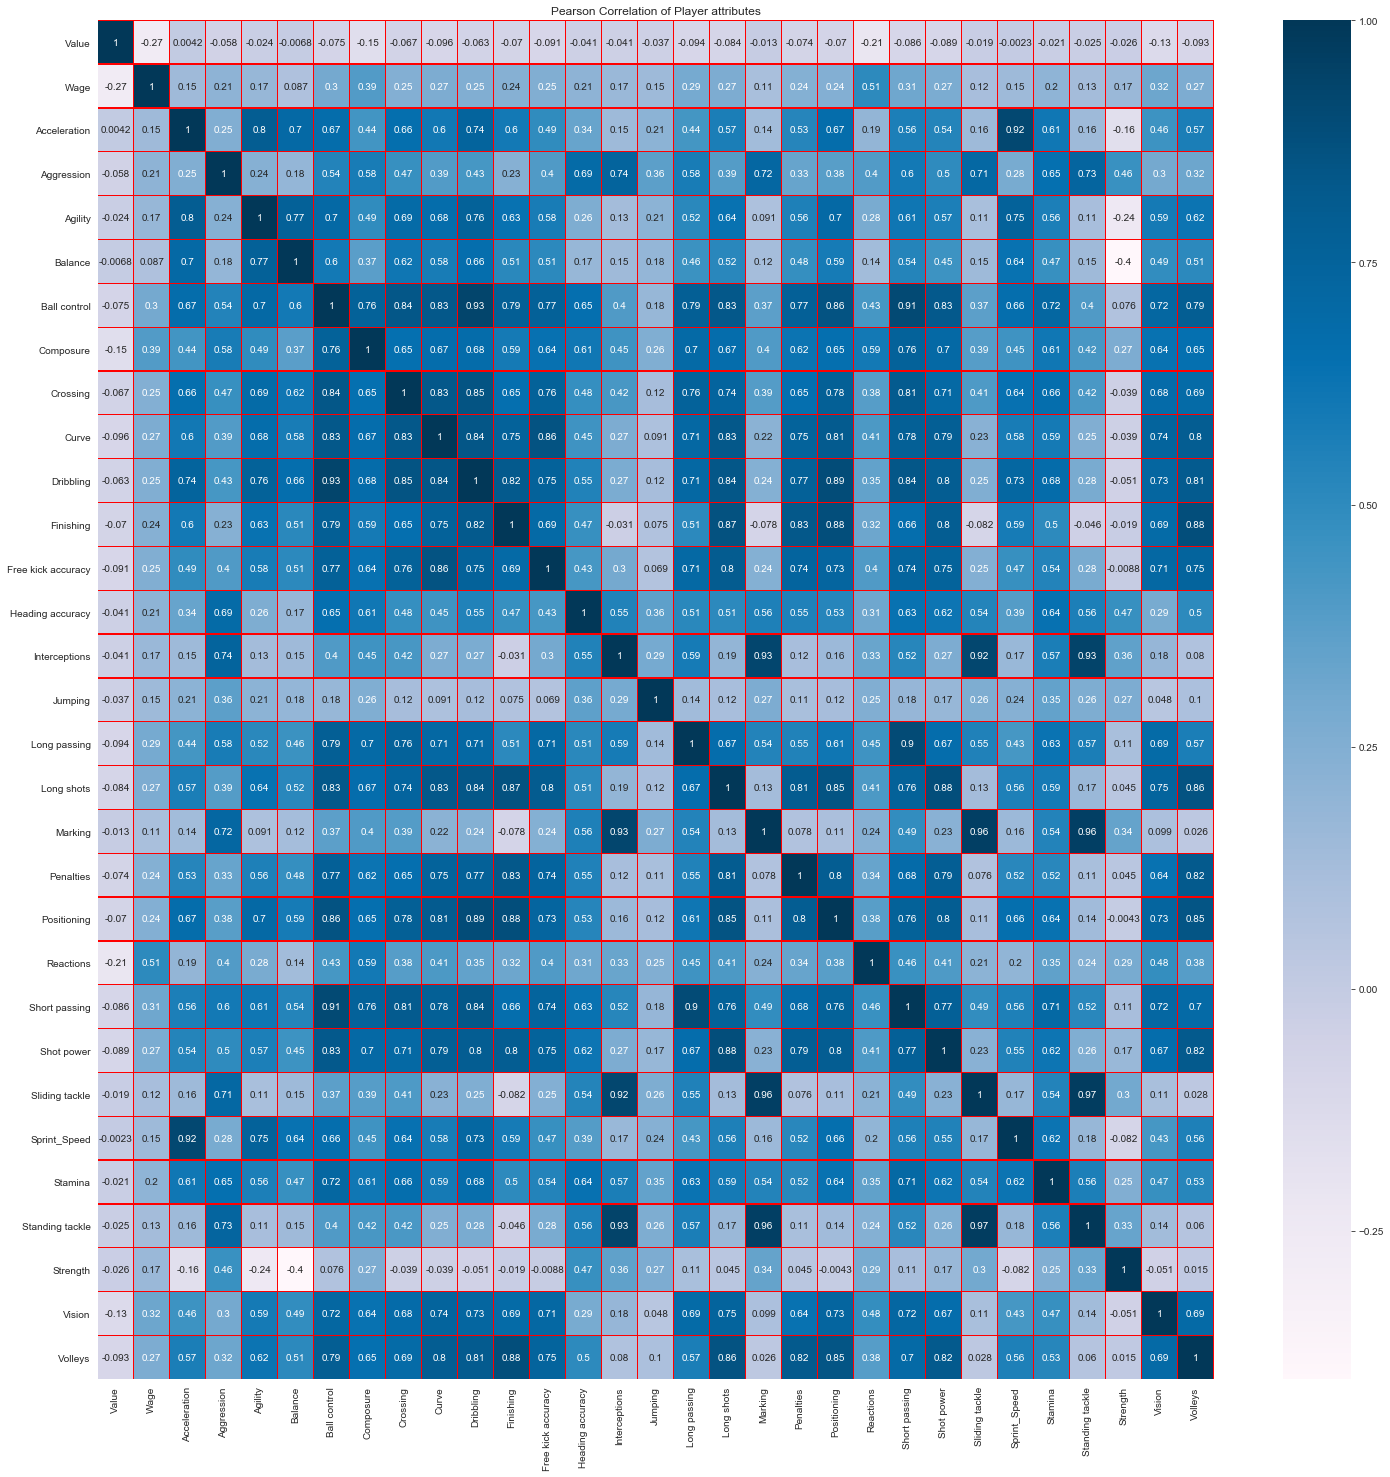

In [35]:
f, ax1 = plt.subplots(figsize=(25, 25))

plt.title('Pearson Correlation of Player attributes')

sns.heatmap(fifa2_outfield.corr(),linewidths=0.3,vmax=1.0, square=False, cmap = 'PuBu', linecolor='red', annot=True, ax = ax1)

plt.show()

As seen above, depending on his strengths, he may want to work on certain skills that can improve others For instance, he may want to work on his stamina and acceleration if he wants to improve his sprint speed. These 3 variables are somewhat causal in most cases, in the following order: Stamina and sprint acceleration determines sprint speed. In some cases, for example, however, attribute relationships are not causal. For example, the Goalkeeper (or GK) attributes are not causal. Other correlated but non-causal variables are 'Positioning' and 'Finishing'. Both these attributes are naturally striker/forward/finisher ('ST') attributes and so a striker would work on both these attributes simultaneously, as would a goalkeeper work on each attribute independently. Dr. Asdfg should keep these causal vs correlated relationships in mind.

One can easily see the other correlations between the other variables.


### CHAPTER 1 CONCLUSION:

The analyses above show plenty summary statistics of a team; and measures them against that of a player. A verdict that can be drawn here is that if a predictor would like to place a stake of support in a player, a good option is to bet on a player who chooses a team where he is relatively better than the rest of his team. It only stands to reason that since his abilities are likely to improve a team, he will be seen as a footballer with great career prospects.

# CHAPTER 2: TEAM PERFORMANCE ANALYSIS
***

The chapter above illustrated attributes that make up the strength of a team - the 'overall' rating of a player.

For a good understanding of the link between the strength of a team and its performance, we perform analyses on three teams chosen. For an interesting analysis, we pick one of the most competitive leagues - according to evidence that is anecdotal, and somewhat emperical - the English Premier League. Wins are recorded with a score of 3, draws with a 1 and losses by a 0. We then plot graphs using this representation.

# PART 2.1: DATA REPRESENTATION

# Section 2.1.1: Data Collection, Loading and Preparation
The English Premier League for the years recorded began in August and ended in May of the following calendar year. The English Premier League log of performance metrics for the football years ending in May of each year for the years 2016 to 2018 are shown below:

Source: https://www.premierleague.com/tables

Verified against: http://www.skysports.com/football/tables

## English Premier League points log for football year ending May 2018

![title](bpl_log18.png)

## English Premier League points log for football year ending May 2017

![title](bpl_log17.png)

## English Premier League points log for football year ending May 2016

![title](bpl_log16.png)

## English Premier League points log for football year ending May 2015

![title](bpl_log15.png)

# Section 2.1.2: Teams Chosen and their Log Records

The top (1st), middle (9th) and bottom (17th) teams of the most recent (2018) year are chosen for the analysis and forecast (teams 18-20 do not compete in the following year). 

Top team: Manchester City
    Overall average: 

Middle team: Leicester City
    Overall average: 

Bottom team: Southampton
    Overall average: 

 
#### Source of Manchester City Football Club's records:
 
2018:
https://www.sportsmole.co.uk/football/man-city/2017-18/fixtures-and-results.html#JbyEvent
        
2017:
https://www.sportsmole.co.uk/football/man-city/2016-17/fixtures-and-results.html#JbyEvent
        
2016:
https://www.sportsmole.co.uk/football/man-city/2015-16/fixtures-and-results.html#JbyEvent
    
2015:
https://www.sportsmole.co.uk/football/man-city/2014-15/fixtures-and-results.html#JbyEvent
        
Source verified against: http://www.skysports.com/manchester-city-results
        
 
#### Source of Leicester City Football Club's records:
 
2018:
https://www.sportsmole.co.uk/football/leicester-city/2017-18/fixtures-and-results.html#JbyEvent
        
2017:
https://www.sportsmole.co.uk/football/leicester-city/2016-17/fixtures-and-results.html#JbyEvent
        
2016:
https://www.sportsmole.co.uk/football/leicester-city/2015-16/fixtures-and-results.html#JbyEvent
    
2015:
https://www.sportsmole.co.uk/football/leicester-city/2014-15/fixtures-and-results.html#JbyEvent
        
Source verified against: http://www.skysports.com/leicester-city-results
        
        
####   Source of Southampton Football Club's record:
2018:
https://www.sportsmole.co.uk/football/southampton/2017-18/fixtures-and-results.html#JbyEvent
    
2017:
https://www.sportsmole.co.uk/football/southampton/2016-17/fixtures-and-results.html#JbyEvent
    
2016:
https://www.sportsmole.co.uk/football/southampton/2015-16/fixtures-and-results.html#JbyEvent
    
2015:
https://www.sportsmole.co.uk/football/southampton/2014-15/fixtures-and-results.html#JbyEvent        
        
Source verified against: http://www.skysports.com/southampton-results

        

The $points$ tallies for each team chosen above teams is drawn up using the above sources.Recall that 3s 1s and 0s represent wins, draws and losses, respectively:

## Manchester City record

Year Ending May 2018

In [36]:
mc_record18 = pd.Series([3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3])
mc_rec_sum18 = mc_record18.cumsum()
mc_df18 = pd.DataFrame(data = {'Record': mc_record18, 'Cumulative Points': mc_rec_sum18})
mc_df18['Result'] = mc_df18['Record'].replace({3: 'Win', 1: 'Draw', 0: 'Loss'})
mc_df18['Game'] = np.arange(mc_df18.shape[0])
mc_df18.set_index(pd.date_range('2017-07-31', periods=38, freq='W'), append=False, inplace=True, verify_integrity=False)
mc_df18.index.name = 'Week Of'


Year Ending May 2017

In [37]:
mc_record17 = pd.Series([3, 3, 3, 3, 3, 3, 0, 1, 1, 3, 1, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3, 3, 1, 1, 1, 0, 3, 3, 1, 1, 3, 3, 3, 3])
# sns.tsplot(fcb_rec.cumsum())
mc_rec_sum17 = mc_record17.cumsum()
mc_df17 = pd.DataFrame(data = {'Record': mc_record17, 'Cumulative Points': mc_rec_sum17})
mc_df17['Result'] = mc_df17['Record'].replace({3: 'Win', 1: 'Draw', 0: 'Loss'})
mc_df17['Game'] = np.arange(mc_df17.shape[0])
mc_df17.set_index(pd.date_range('2016-07-31', periods=38, freq='W'), append=False, inplace=True, verify_integrity=False)
mc_df17.index.name = 'Week Of'

Year ending May 2016

In [38]:
mc_record16 = pd.Series([3, 3, 3, 3, 3, 0, 0, 3, 3, 1, 3, 1, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 1, 3, 0, 0, 0, 3, 1, 0, 3, 3, 3, 1, 3, 0, 1, 1])
# sns.tsplot(fcb_rec.cumsum())
mc_rec_sum16 = mc_record16.cumsum()
mc_df16 = pd.DataFrame(data = {'Record': mc_record16, 'Cumulative Points': mc_rec_sum16})
mc_df16['Result'] = mc_df16['Record'].replace({3: 'Win', 1: 'Draw', 0: 'Loss'})
mc_df16['Game'] = np.arange(mc_df16.shape[0])
mc_df16.set_index(pd.date_range('2015-07-31', periods=38, freq='W'), append=False, inplace=True, verify_integrity=False)
mc_df16.index.name = 'Week Of'

Year ending May 2015

In [39]:
mc_record15 = pd.Series([3, 3, 0, 1, 1, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 0, 1, 1, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3])
# sns.tsplot(fcb_rec.cumsum())
mc_rec_sum15 = mc_record15.cumsum()
mc_df15 = pd.DataFrame(data = {'Record': mc_record15, 'Cumulative Points': mc_rec_sum15})
mc_df15['Result'] = mc_df15['Record'].replace({3: 'Win', 1: 'Draw', 0: 'Loss'})
mc_df15['Game'] = np.arange(mc_df15.shape[0])
mc_df15.set_index(pd.date_range('2014-07-31', periods=38, freq='W'), append=False, inplace=True, verify_integrity=False)
mc_df15.index.name = 'Week Of'

## Leicester City record

Year Ending May 2018

In [40]:
le_record18 = pd.Series([0, 3, 0, 0, 1, 0, 1, 1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 0, 1, 0, 0, 3, 1, 3, 0, 1, 0, 1, 1, 3, 3, 0, 0, 1, 0, 0, 3, 0])
# sns.tsplot(fcb_rec.cumsum())
le_rec_sum18 = le_record18.cumsum()
le_df18 = pd.DataFrame(data = {'Record': le_record18, 'Cumulative Points': le_rec_sum18})
le_df18['Result'] = le_df18['Record'].replace({3: 'Win', 1: 'Draw', 0: 'Loss'})
le_df18['Game'] = np.arange(le_df18.shape[0])
le_df18.set_index(pd.date_range('2017-07-31', periods=38, freq='W'), append=False, inplace=True, verify_integrity=False)
le_df18.index.name = 'Week Of'

Year Ending May 2017

In [41]:
le_record17 = pd.Series([0, 1, 3, 0, 3, 0, 1, 0, 3, 1, 0, 0, 1, 0, 3, 0, 1, 0, 3, 1, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 1, 0, 3, 3, 0, 0, 1])
# sns.tsplot(fcb_rec.cumsum())
le_rec_sum17 = le_record17.cumsum()
le_df17 = pd.DataFrame(data = {'Record': le_record17, 'Cumulative Points': le_rec_sum17})
le_df17['Result'] = le_df17['Record'].replace({3: 'Win', 1: 'Draw', 0: 'Loss'})
le_df17['Game'] = np.arange(le_df17.shape[0])
le_df17.set_index(pd.date_range('2016-07-31', periods=38, freq='W'), append=False, inplace=True, verify_integrity=False)
le_df17.index.name = 'Week Of'

Year Ending May 2016

In [42]:
le_record16 = pd.Series([3, 3, 1, 1, 3, 1, 0, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 0, 1, 1, 3, 1, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1])
 #  sn s. ts plot(fcb_rec.cumsum())
le_rec_sum16 = le_record16.cumsum()
le_df16 = pd.DataFrame(data = {'Record': le_record16, 'Cumulative Points': le_rec_sum16})
le_df16['Result'] = le_df16['Record'].replace({3: 'Win', 1: 'Draw', 0: 'Loss'})
le_df16['Game'] = np.arange(le_df16.shape[0])
le_df16.set_index(pd.date_range('2015-07-31', periods=38, freq='W'), append=False, inplace=True, verify_integrity=False)
le_df16.index.name = 'Week Of'

Year Ending May 2015

In [43]:
le_record15 = pd.Series([1, 0, 1, 3, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 0, 0, 0, 1, 0, 1, 0, 3, 3, 3, 3, 0, 3, 3, 1, 3])
 #  sn s. ts plot(fcb_rec.cumsum())
le_rec_sum15 = le_record15.cumsum()
le_df15 = pd.DataFrame(data = {'Record': le_record15, 'Cumulative Points': le_rec_sum15})
le_df15['Result'] = le_df15['Record'].replace({3: 'Win', 1: 'Draw', 0: 'Loss'})
le_df15['Game'] = np.arange(le_df15.shape[0])
le_df15.set_index(pd.date_range('2014-07-31', periods=38, freq='W'), append=False, inplace=True, verify_integrity=False)
le_df15.index.name = 'Week Of'

## Southampton record

Year Ending May 2018

In [44]:
sc_record18 = pd.Series([1, 3, 1, 0, 3, 0, 0, 1, 3, 1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 3, 0, 1, 1, 0, 0, 0, 0, 1, 3, 1, 3, 0])
# sns.tsplot(fcb_rec.cumsum())
sc_rec_sum18 = sc_record18.cumsum()
sc_df18 = pd.DataFrame(data = {'Record': sc_record18, 'Cumulative Points': sc_rec_sum18})
sc_df18['Result'] = sc_df18['Record'].replace({3: 'Win', 1: 'Draw', 0: 'Loss'})
sc_df18['Game'] = np.arange(sc_df18.shape[0])
sc_df18.set_index(pd.date_range('2017-07-31', periods=38, freq='W'), append=False, inplace=True, verify_integrity=False)
sc_df18.index.name = 'Week Of'

Year Ending May 2017

In [46]:
sc_record17 = pd.Series([1, 0, 1, 0, 3, 3, 1, 3, 1, 0, 0, 1, 3, 0, 3 , 1, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 1, 3, 3, 0, 0, 1, 1, 0, 3, 1, 0])
# sns.tsplot(fcb_rec.cumsum())
sc_rec_sum17 = sc_record17.cumsum()
sc_df17 = pd.DataFrame(data = {'Record': sc_record17, 'Cumulative Points': sc_rec_sum17})
sc_df17['Result'] = sc_df17['Record'].replace({3: 'Win', 1: 'Draw', 0: 'Loss'})
sc_df17.set_index(pd.date_range('2016-07-31', periods=38, freq='W'), append=False, inplace=True, verify_integrity=False)
sc_df17.index.name = 'Week Of'

Year Ending May 2016

In [47]:
sc_record16 = pd.Series([1, 0, 1, 3, 1, 0, 3, 3, 1, 1, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 3, 3, 1, 3, 3, 0, 0, 1, 3, 3, 0, 3, 1, 3, 3, 3, 3])
# sns.tsplot(fcb_rec.cumsum())
sc_rec_sum16 = sc_record16.cumsum()
sc_df16 = pd.DataFrame(data = {'Record': sc_record16, 'Cumulative Points': sc_rec_sum16})
sc_df16['Result'] = sc_df16['Record'].replace({3: 'Win', 1: 'Draw', 0: 'Loss'})
sc_df16['Game'] = np.arange(sc_df16.shape[0])
sc_df16.set_index(pd.date_range('2015-07-31', periods=38, freq='W'), append=False, inplace=True, verify_integrity=False)
sc_df16.index.name = 'Week Of'

Year Ending May 2015

In [48]:
sc_record15 = pd.Series([0, 1, 3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 0, 0, 0, 0, 3, 3, 1, 3, 3, 3, 0, 3, 1, 0, 0, 3, 1, 3, 0, 3, 0, 1, 0, 0, 3, 0])
# sns.tsplot(fcb_rec.cumsum())
sc_rec_sum15 = sc_record15.cumsum()
sc_df15 = pd.DataFrame(data = {'Record': sc_record15, 'Cumulative Points': sc_rec_sum15})
sc_df15['Result'] = sc_df15['Record'].replace({3: 'Win', 1: 'Draw', 0: 'Loss'})
sc_df15['Game'] = np.arange(sc_df15.shape[0])
sc_df15.set_index(pd.date_range('2014-07-31', periods=38, freq='W'), append=False, inplace=True, verify_integrity=False)
sc_df15.index.name = 'Week Of'


# Section 2.1.3: $Points$ Plots

The plots below shows their performance over the years via a representation of the above tables in Section 2.2 using the 'Cumulative Points' column. As we will see, the average gradient of performance over time is larger than 0. Its significance is discussed later in this text.

## Manchester City Plots

C:\Users\bseot\Anaconda3\envs\education1\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


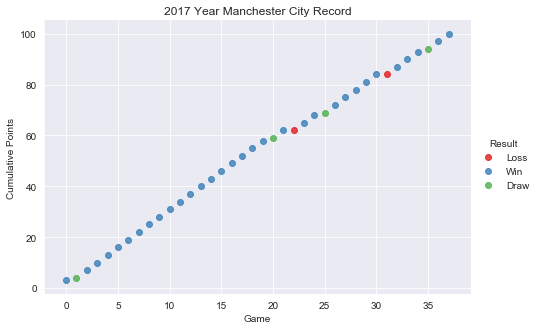

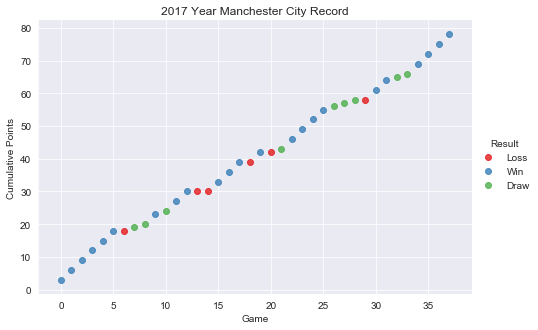

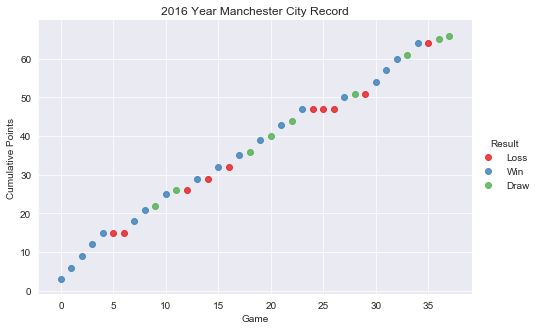

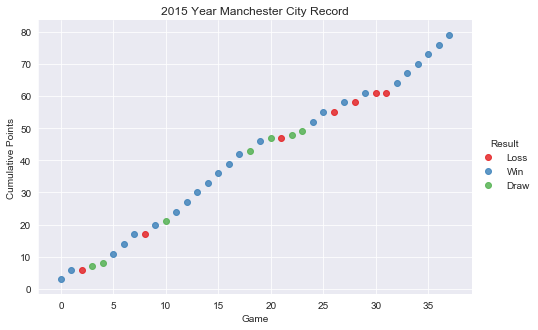

In [49]:
#2018
sns.lmplot(x = 'Game', y = 'Cumulative Points', data = mc_df18, hue = 'Result', hue_order = ['Loss', 'Win', 'Draw'], fit_reg = False, size=4.5, aspect=1.5, palette = 'Set1')
ax1 = plt.gca()
ax1.set_title('2017 Year Manchester City Record')
#2017
sns.lmplot(x = 'Game', y = 'Cumulative Points', data = mc_df17, hue = 'Result', hue_order = ['Loss', 'Win', 'Draw'], fit_reg = False, size=4.5, aspect=1.5, palette = 'Set1')
ax1 = plt.gca()
ax1.set_title('2017 Year Manchester City Record')
#2016
sns.lmplot(x = 'Game', y = 'Cumulative Points', data = mc_df16, hue = 'Result', hue_order = ['Loss', 'Win', 'Draw'], fit_reg = False, size=4.5, aspect=1.5, palette = 'Set1')
ax1 = plt.gca()
ax1.set_title('2016 Year Manchester City Record')
#2015
sns.lmplot(x = 'Game', y = 'Cumulative Points', data = mc_df15, hue = 'Result', hue_order = ['Loss', 'Win', 'Draw'], fit_reg = False, size=4.5, aspect=1.5, palette = 'Set1')
ax1 = plt.gca()
ax1.set_title('2015 Year Manchester City Record')
plt.show()

## Leicester City Plots


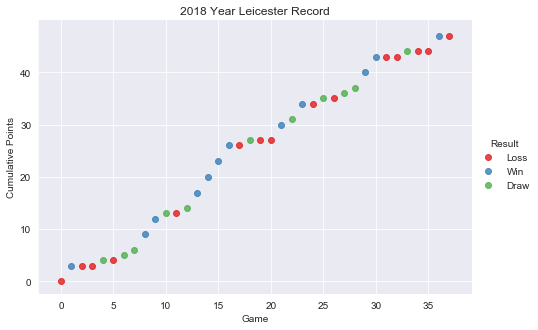

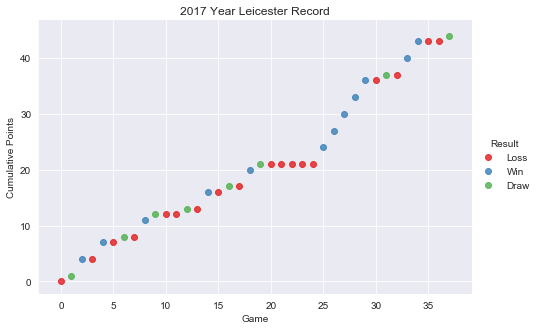

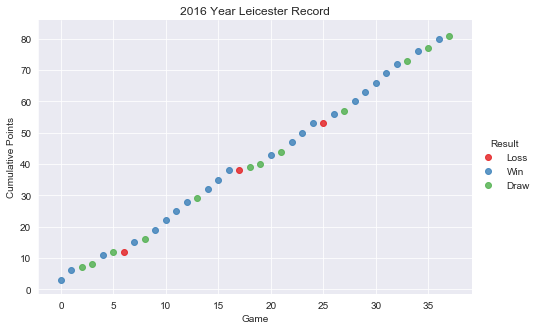

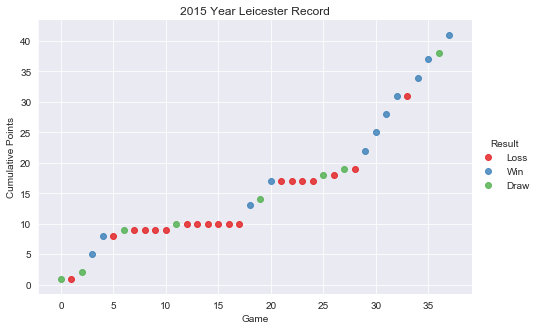

In [50]:
#2018
sns.lmplot(x = 'Game', y = 'Cumulative Points', data = le_df18, hue = 'Result', hue_order = ['Loss', 'Win', 'Draw'], fit_reg = False, size=4.5, aspect=1.5, palette = 'Set1')
ax2 = plt.gca()
ax2.set_title('2018 Year Leicester Record')

#2017
sns.lmplot(x = 'Game', y = 'Cumulative Points', data = le_df17, hue = 'Result', hue_order = ['Loss', 'Win', 'Draw'], fit_reg = False, size=4.5, aspect=1.5, palette = 'Set1')
ax2 = plt.gca()
ax2.set_title('2017 Year Leicester Record')

#2016
sns.lmplot(x = 'Game', y = 'Cumulative Points', data = le_df16, hue = 'Result', hue_order = ['Loss', 'Win', 'Draw'], fit_reg = False, size=4.5, aspect=1.5, palette = 'Set1')
ax2 = plt.gca()
ax2.set_title('2016 Year Leicester Record')

#2015
sns.lmplot(x = 'Game', y = 'Cumulative Points', data = le_df15, hue = 'Result', hue_order = ['Loss', 'Win', 'Draw'], fit_reg = False, size=4.5, aspect=1.5, palette = 'Set1')
ax2 = plt.gca()
ax2.set_title('2015 Year Leicester Record')

plt.show()

## Southampton Plots


KeyError: "['Game'] not in index"

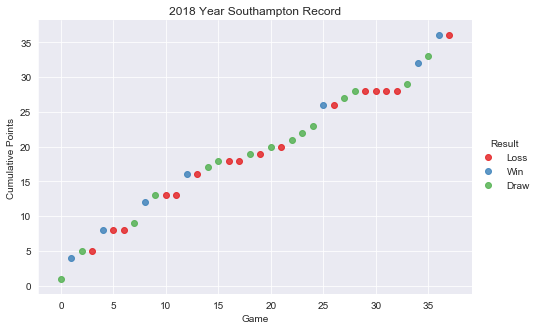

In [51]:
#2018
sns.lmplot(x = 'Game', y = 'Cumulative Points', data = sc_df18, hue = 'Result', hue_order = ['Loss', 'Win', 'Draw'], fit_reg = False, size=4.5, aspect=1.5, palette = 'Set1')
ax3 = plt.gca()
ax3.set_title('2018 Year Southampton Record')

#2017
sns.lmplot(x = 'Game', y = 'Cumulative Points', data = sc_df17, hue = 'Result', hue_order = ['Loss', 'Win', 'Draw'], fit_reg = False, size=4.5, aspect=1.5, palette = 'Set1')
ax3 = plt.gca()
ax3.set_title('2017 Year Southampton Record')

#2016
sns.lmplot(x = 'Game', y = 'Cumulative Points', data = sc_df16, hue = 'Result', hue_order = ['Loss', 'Win', 'Draw'], fit_reg = False, size=4.5, aspect=1.5, palette = 'Set1')
ax3 = plt.gca()
ax3.set_title('2016 Year Southampton Record')
#2016
sns.lmplot(x = 'Game', y = 'Cumulative Points', data = sc_df15, hue = 'Result', hue_order = ['Loss', 'Win', 'Draw'], fit_reg = False, size=4.5, aspect=1.5, palette = 'Set1')
ax3 = plt.gca()
ax3.set_title('2015 Year Southampton Record')



plt.show()

In [55]:
sc_df18

,Record,Cumulative Points,Result,Game
Week Of,,,,
2017-08-06,1,1,Draw,0
2017-08-13,3,4,Win,1
2017-08-20,1,5,Draw,2
2017-08-27,0,5,Loss,3
2017-09-03,3,8,Win,4
2017-09-10,0,8,Loss,5
2017-09-17,0,8,Loss,6
2017-09-24,1,9,Draw,7
2017-10-01,3,12,Win,8


# Section 2.1.4: Time-Series plots

For forecasting we convert the data of performances in Section 2.2 into a time series. 

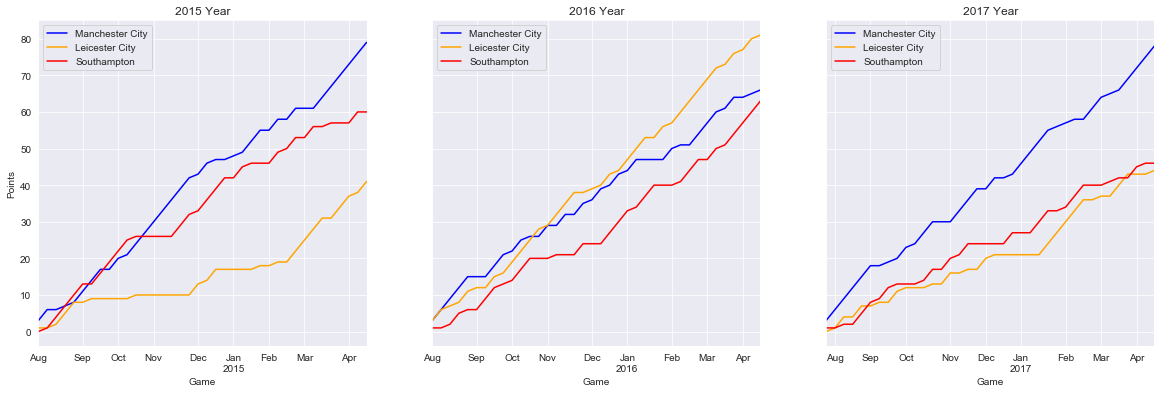

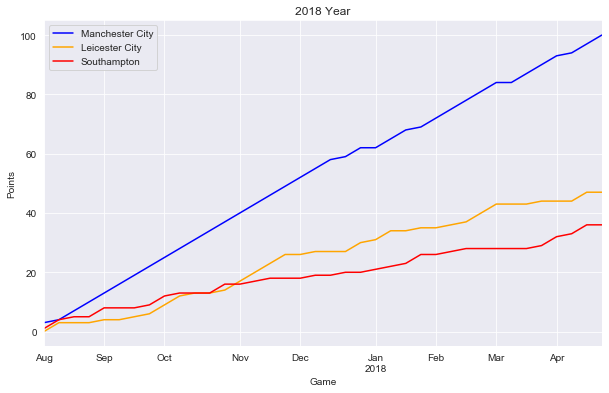

In [56]:
#Manchester City's Performance for the football year ending May 2015
mc_ts15 = pd.Series(mc_df15['Cumulative Points'])
mc_ts15.index.name = 'Game'

#Leicester City's Performance for the football year ending May 2015

le_ts15 = pd.Series(le_df15['Cumulative Points'])
le_ts15.index.name = 'Game'

#Southampton's Performance for the football year ending May 2015
sc_ts15 = pd.Series(sc_df15['Cumulative Points'])
sc_ts15.index.name = 'Game'

#Plots
fig, ax1 = plt.subplots(1, 3, figsize = (20, 6), sharey = True)

ax1[0].set_ylabel('Points')
ax1[0].set_title('2015 Year')
mc_ts15.plot(label = 'Manchester City', ax = ax1[0], legend = True,  color = 'b')
le_ts15.plot(label = 'Leicester City', ax = ax1[0], legend = True,color = 'orange' )
sc_ts15.plot(label = 'Southampton', ax = ax1[0], legend = True, color = 'red')




############################################################################################################################

#Manchester City's Performance for the football year ending May 2016
mc_ts16 = pd.Series(mc_df16['Cumulative Points'])
mc_ts16.index.name = 'Game'

#Leicester City's Performance for the football year ending May 2016

le_ts16 = pd.Series(le_df16['Cumulative Points'])
le_ts16.index.name = 'Game'

#Southampton's Performance for the football year ending May 2016
sc_ts16 = pd.Series(sc_df16['Cumulative Points'])
sc_ts16.index.name = 'Game'

#Plots
ax1[1].set_ylabel('Points')
ax1[1].set_title('2016 Year')
mc_ts16.plot(label = 'Manchester City', ax = ax1[1], legend = True,  color = 'b')
le_ts16.plot(label = 'Leicester City', ax = ax1[1], legend = True, color = 'orange')
sc_ts16.plot(label = 'Southampton', ax = ax1[1], legend = True, color = 'red')

############################################################################################################################

#Manchester City's Performance for the football year ending May 2017
mc_ts17 = pd.Series(mc_df17['Cumulative Points'])
mc_ts17.index.name = 'Game'

#Leicester City's Performance for the football year ending May 2017

le_ts17 = pd.Series(le_df17['Cumulative Points'])
le_ts17.index.name = 'Game'

#Southampton's Performance for the football year ending May 2017
sc_ts17 = pd.Series(sc_df17['Cumulative Points'])
sc_ts17.index.name = 'Game'

#Plots
ax1[2].set_ylabel('Points')
ax1[2].set_title('2017 Year')
mc_ts17.plot(label = 'Manchester City', ax = ax1[2], legend = True,  color = 'b')
le_ts17.plot(label = 'Leicester City', ax = ax1[2], legend = True, color = 'orange')
sc_ts17.plot(label = 'Southampton', ax = ax1[2], legend = True, color = 'red')

############################################################################################################################


#Manchester City's Performance for the football year ending May 2018
mc_ts18 = pd.Series(mc_df18['Cumulative Points'])
mc_ts18.index.name = 'Game'

#Leicester City's Performance for the football year ending May 2018

le_ts18 = pd.Series(le_df18['Cumulative Points'])
le_ts18.index.name = 'Game'

#Southampton's Performance for the football year ending May 2018
sc_ts18 = pd.Series(sc_df18['Cumulative Points'])
sc_ts18.index.name = 'Game'

#Plots
fig, ax = plt.subplots(figsize = (10, 6))

ax.set_ylabel('Points')
ax.set_title('2018 Year')
mc_ts18.plot(label = 'Manchester City', ax = ax, legend = True,  color = 'b')
le_ts18.plot(label = 'Leicester City', ax = ax, legend = True, color = 'orange')
sc_ts18.plot(label = 'Southampton', ax = ax, legend = True, color = 'red')
plt.show()

### Analysis:
The gradient of the graphs between any two points tells us about their run of form (gradient of 3 for a rise in form, 1 for stagnation and a 0 for a dip in form). Due to this numbering, any point on the graph is numerically significant - for each point on the 'Game' axis, the corresponding 'Points' value tells us the number of points accrued up to that game. The  gradient between the first and last points tell us the average number of points per game.

From the 2015 chart, we are able to tell that Manchester City's performance exhibits the strongest upwards trend, followed by Southampton andLeicester City. The order of the number of points accrued per year changes. This leads us to suggest that it is difficult to gauge the number of points a team will accrue in the following year.



# Section 2.1.5: Time Series Autocorrelation Plot

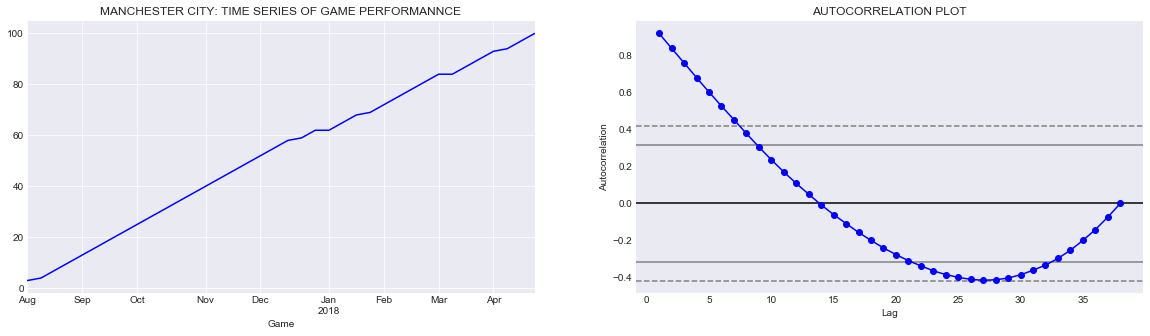

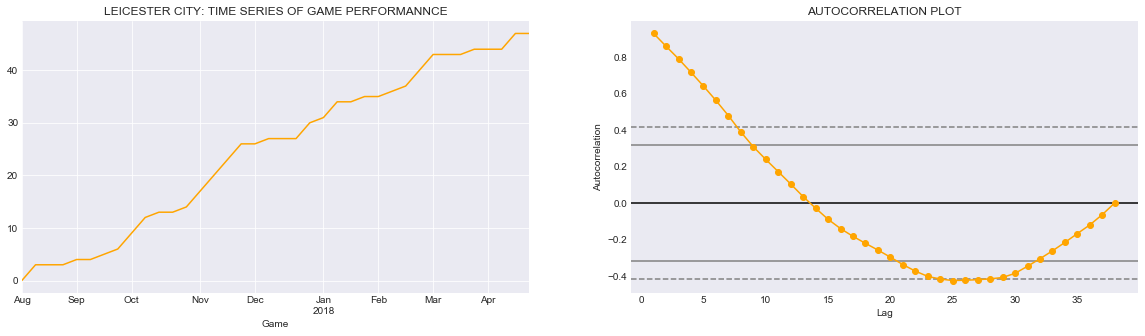

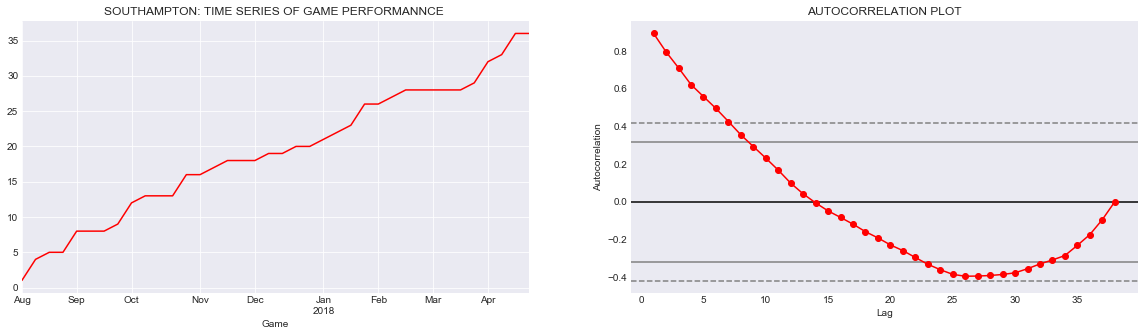

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

mc_ts18.plot(color = 'b' ,ax = ax[0])
ax[0].set_title('MANCHESTER CITY: TIME SERIES OF GAME PERFORMANNCE')
autocorrelation_plot(mc_ts18, marker ='o', color = 'b', ax = ax[1])
ax[1].set_title('AUTOCORRELATION PLOT')

fig, ax1 = plt.subplots(1, 2, figsize = (20, 5))

le_ts18.plot(color = 'orange' ,ax = ax1[0])
ax1[0].set_title('LEICESTER CITY: TIME SERIES OF GAME PERFORMANNCE')
autocorrelation_plot(le_ts18, marker ='o', color = 'orange', ax = ax1[1])
ax1[1].set_title('AUTOCORRELATION PLOT')


fig, ax2 = plt.subplots(1, 2, figsize = (20, 5))

sc_ts18.plot(color = 'red' ,ax = ax2[0])
ax2[0].set_title('SOUTHAMPTON: TIME SERIES OF GAME PERFORMANNCE ')
autocorrelation_plot(sc_ts18, marker ='o', color = 'r', ax = ax2[1])
ax2[1].set_title('AUTOCORRELATION PLOT')
plt.show()

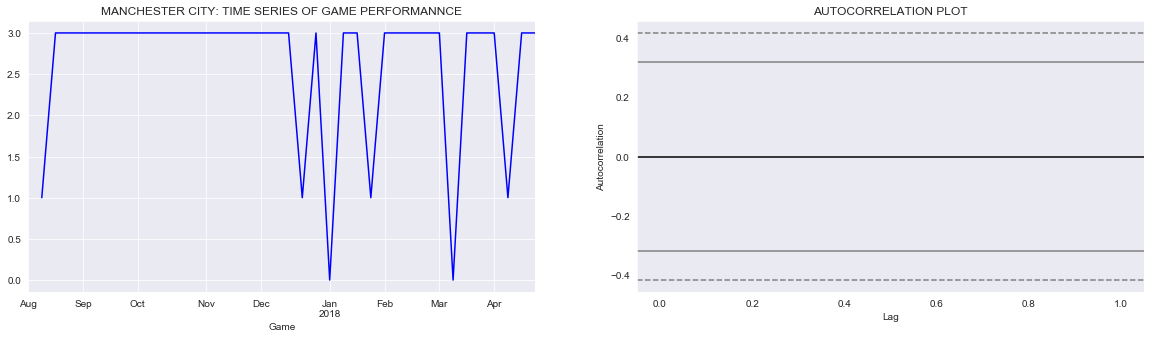

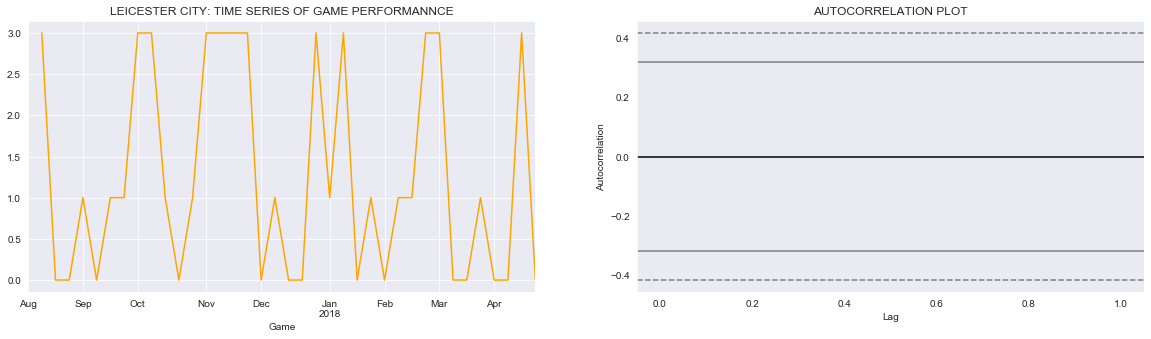

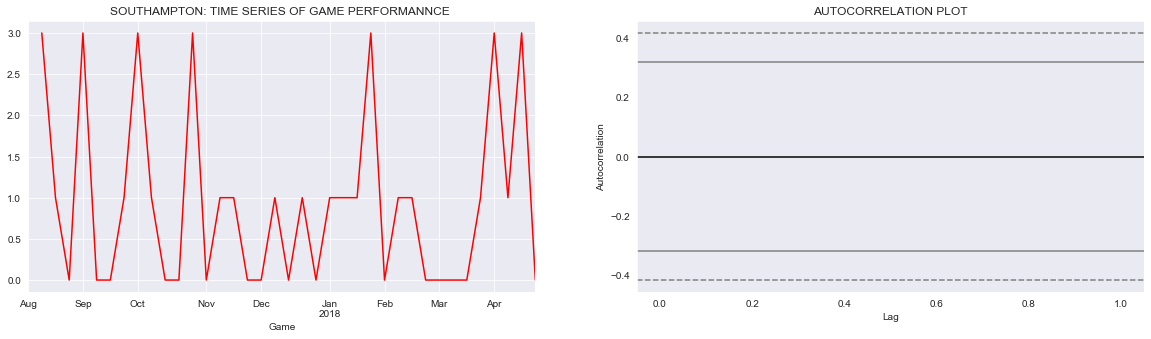

In [57]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

mc_ts18.diff().plot(color = 'b' ,ax = ax[0])
ax[0].set_title('MANCHESTER CITY: TIME SERIES OF GAME PERFORMANNCE')
autocorrelation_plot(mc_ts18.diff(), marker ='o', color = 'b', ax = ax[1])
ax[1].set_title('AUTOCORRELATION PLOT')

fig, ax1 = plt.subplots(1, 2, figsize = (20, 5))

le_ts18.diff().plot(color = 'orange' ,ax = ax1[0])
ax1[0].set_title('LEICESTER CITY: TIME SERIES OF GAME PERFORMANNCE')
autocorrelation_plot(le_ts18.diff(), marker ='o', color = 'orange', ax = ax1[1])
ax1[1].set_title('AUTOCORRELATION PLOT')


fig, ax2 = plt.subplots(1, 2, figsize = (20, 5))

sc_ts18.diff().plot(color = 'red' ,ax = ax2[0])
ax2[0].set_title('SOUTHAMPTON: TIME SERIES OF GAME PERFORMANNCE ')
autocorrelation_plot(sc_ts18.diff(), marker ='o', color = 'r', ax = ax2[1])
ax2[1].set_title('AUTOCORRELATION PLOT')
plt.show()

# Interpretation


### General observation of ACF


The autocorrelation at a lag of 1 observation (or football match result, in this case) shows the correlation between the series and the same series shifted one period backwards (at one lag). The function produces a plot for all possible time lags and this defines the plot.

The steady decrease in the acf value of the series shows that there is an (upward) trend, with seemingly low randomness captured by the significant ACF values 

A specific feature in the pattern is the 'trough' in all of the ACF plots that is formed:
* The steady declines in the acf shows that the autocorrelation value decreases with an increase in the lag. That is, the time series shifted many periods forward will always have a lower correlation with the original time series... Up to a point somewhere near lag 27 for all the plots.
* The acf shows that the correlations of the time series at different lags are significant up to the 7th game in the year, whereafter, the relationship between the time series and its lagged versions are is insignificant statistically. That is to say that statistically, one would find it difficult to predict what would happen to a team's continued form after the 7th game using the original time series (since every (lagged) time series' autocorrelation with the original returns insignificant correlation values after game. 
* The lowest point in this trough coincides with the confidence interval's extremum (99%). That is to say that the autocorrelation values are never significant enough to leave the confidence bands after game 7, although it seems like the downward movement may continue. Instead, there is a turn towards zero.
* The reason the acf values are so low and converge to zero is that each time series gets shorter with an increase in lag, and at the last lag value, the correlarion is computed between only Game 1 (first point in the time series) and Game 38 (last point in the time series). This results in a acf of 0, suggesting that there is no causal (the nature of the time series allows us to make this statement) relationship between the number of points earned in the first game and the number of points accrued by the last game in a year. Thus, there exists no autocorrelation at the final lag value.


### Difference in patterns of the ACF

Before we get into forecasting, note that:

* Manchester City's (blue - top team) time series plot has the least variability
    This links to its very smooth ACF
* Southampton's (red - bottom team) time series plot has the second-least variability
    This links to its fairly smooth ACF
* Leicester City's (orange - mid-table team) time series plot has the most variability
    This links to its relatively choppy ACF

The blue and red smooth acf curves capture the predictability in the performance or consistency of a team over the season. Note that the acf values drop below the significance level only after lag = 7. (Red curve has ACF on the significance boundary; its performance is less consistent). The Orange curve, with the least predictability and most variation produces the most jagged acf plot. More importantly, note the speedy rate of decline in the slope of the ACF - this suggests that the correlation between time series and their lagged (shifted) version decreases at a quuicker rate than it does in the other curves. Notice, that only after game 7 (closer to game 8), do the ACF values fall below significance. This speaks to the lack of predictability in its performance - it is a ranging team that does not give away its next move.

This leads is to suggest that the most consistent team in general is a team that is near the top of the log, followed by teams nearer to the bottom of the log. As we diverge towards teams that are generally near the ends of the logs, we see more predictable patterns - something to consider for a fortune-teller!


# Section 2.1.6: Time Series Decomposition

### We will plot the differenced version of the time series plots, in order to remove the trend inherent in the data, and compare the results

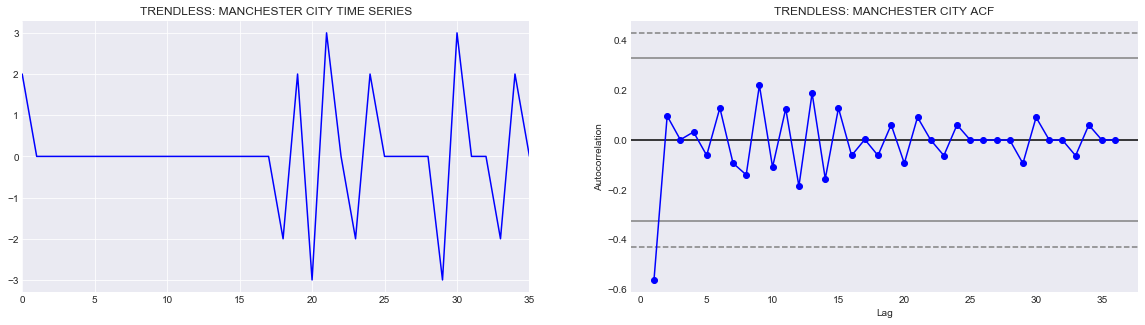

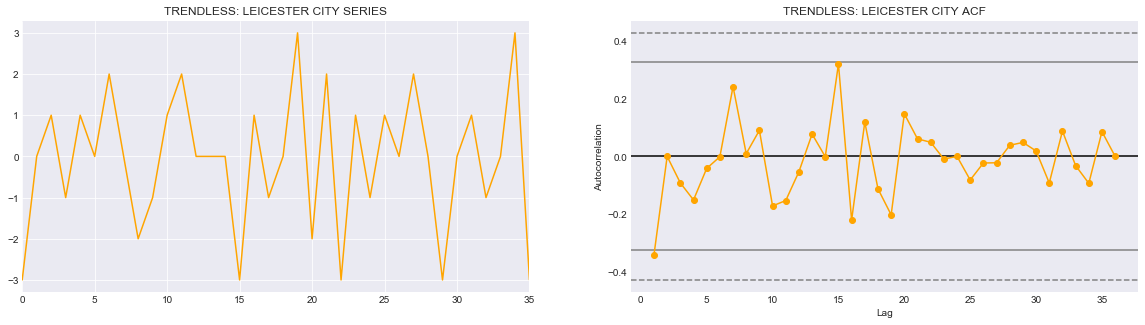

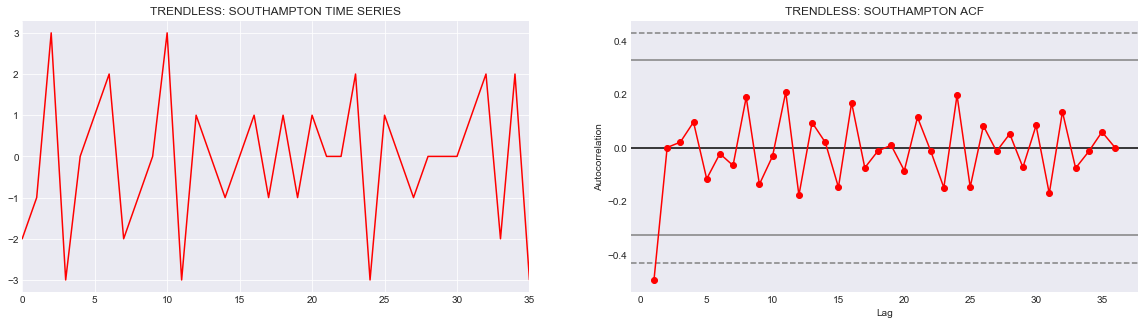

In [54]:
fig, ax1 = plt.subplots(1, 2, figsize = (20, 5))
pd.Series(np.diff(mc_ts18, 2)).plot(color = 'b', ax = ax1[0])
ax1[0].set_title('TRENDLESS: MANCHESTER CITY TIME SERIES')
autocorrelation_plot((pd.Series(np.diff(mc_ts18, 2))), marker ='o', color = 'b', ax = ax1[1])
ax1[1].set_title('TRENDLESS: MANCHESTER CITY ACF')

fig, ax2 = plt.subplots(1, 2, figsize = (20, 5))
pd.Series(np.diff(le_ts18, 2)).plot(color = 'orange', ax = ax2[0])
ax2[0].set_title('TRENDLESS: LEICESTER CITY SERIES')
autocorrelation_plot((pd.Series(np.diff(le_ts18, 2))), marker ='o', color = 'orange', ax = ax2[1])
ax2[1].set_title('TRENDLESS: LEICESTER CITY ACF')

fig, ax3 = plt.subplots(1, 2, figsize = (20, 5))
pd.Series(np.diff(sc_ts18, 2)).plot(color = 'r', ax = ax3[0])
ax3[0].set_title('TRENDLESS: SOUTHAMPTON TIME SERIES')
autocorrelation_plot((pd.Series(np.diff(sc_ts18, 2))), marker ='o', color = 'r', ax = ax3[1])
ax3[1].set_title('TRENDLESS: SOUTHAMPTON ACF')
plt.show()

With the trend removed, using a differencing of order 2, we can see that our results are vastly different. The randomness in the data is exposed by the differencing, and because there is no seasonality, what is portrayed by the time series looks like white noise in the time series plots.

The randomness in the differenced data is shown in ACF plots. No ACF values besides lag 1 shows any significant correlation between a time series and any of its other lagged values at 95 or 99% confidence.

The next section shows some methods, along with an evaluation metric to test the accuracy in each approach.

# PART 2.2: FORECASTING


We will create forecasts, based on the performance of each team, to see where the team might end up in 2019.

## Forecasting Methods:

The graphs in Part 2.1 exhibit no seasonality; the fluctuations in each trend will not be very meaningful to our analysis. So, as a hypothesis:


* The seasonal naive method of forecasting does not seem practical. 

* The naive method of forecasting will be an unlikely representative of the future because the result of a team's final game of a year in no way determines the direction of a team's continued form into the following year. 

* The drift forecasting method seems a plausible prediction of continued form, since the average gradient of each graph represents the number of points per game in the season. The drift method extrapolates the average change seen in the historical data.

## Forecasting Approaches:


1) **One-year** approach:

Our first method involves using data from 2017. It will be compared with the actual 2018 data

2) **Three-year** approach: 

Our second method will use the average number of 'Points' for each team from 2015 to 2017 to create a naive forecast into the 2018 year. Comparisons will be made between these two approaches



## Forecasting Data:

A total of three forecasts for each team will be made:
* Forecast 1: Using the **One-year** (2017) performance data to forecast 2018 (known) performance as a test
* Forecast 2: Using the **Three-year** (2015 to 2017) performance data to forecast 2018 (known) performance as a test
* Forecast 3: Using the best of **One-year** and **Three-year** performance data to forecast 2019 (unknown) performance as a prediction for the number of points to be accumulated by the teams.

Credit for the 'drift' and 'mase'  functions used in this section: Dr Terence van Zyl, with reference to these notebooks, [notebook 1](FPP2.ipynb) and [notebook 2](FPP3.ipynb), adapted from the theory in [Rob J Hyndman and George Athanasopoulos' Forecasting: Principles and Practice](https://otexts.org/fpp2/)


The function was slightly altered to have the graph values start at 0, since the level or number of points at which a team ended is immaterial to where they start the following season (that is, all teams start at 0 points)

In [55]:
def drift11(y, h):
    temp = [hi*(y.values.T[-1]-y.values.T[0])/(len(y)-1) for hi in range(1,h+1)]
    index = y.index.shift(h)[-h:]
    return pd.Series(temp, index=index)

Of all possible forecast methods, the simple Drift method was chosen because the our best guess for a team's continued form in the following year is their performance in the current year.

That is, if the 2017 year is anything to go by, each of the teams will end on the same number of points in the 2018 year as they did in the 2017 year. This seems a like a naive view, but not an unreasonable one given the information. 

## Section 2.2.1: Forecast 1 - Using 1 2017 data only

In [56]:
mc_ts18.index = drift11(mc_ts17, h = 38).index
le_ts18.index = drift11(le_ts17, h = 38).index
sc_ts18.index = drift11(sc_ts17, h = 38).index
sc_ts18

Game
2017-04-23     1
2017-04-30     4
2017-05-07     5
2017-05-14     5
2017-05-21     8
2017-05-28     8
2017-06-04     8
2017-06-11     9
2017-06-18    12
2017-06-25    13
2017-07-02    13
2017-07-09    13
2017-07-16    16
2017-07-23    16
2017-07-30    17
2017-08-06    18
2017-08-13    18
2017-08-20    18
2017-08-27    19
2017-09-03    19
2017-09-10    20
2017-09-17    20
2017-09-24    21
2017-10-01    22
2017-10-08    23
2017-10-15    26
2017-10-22    26
2017-10-29    27
2017-11-05    28
2017-11-12    28
2017-11-19    28
2017-11-26    28
2017-12-03    28
2017-12-10    29
2017-12-17    32
2017-12-24    33
2017-12-31    36
2018-01-07    36
Freq: W-SUN, Name: Cumulative Points, dtype: int64

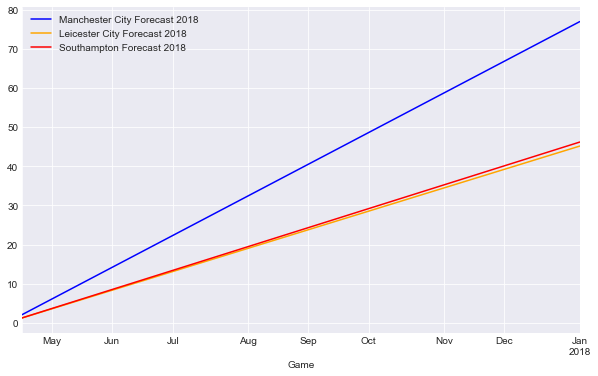

In [57]:
fig, ax4 = plt.subplots(figsize = (10, 6))
drift11(mc_ts17, h=38).plot(label='Manchester City Forecast 2018', legend = True,  color = 'b')
drift11(le_ts17, h=38).plot(label='Leicester City Forecast 2018', legend = True, color = 'orange')
drift11(sc_ts17, h=38).plot(label='Southampton Forecast 2018', legend = True, color = 'red')
plt.show()

These forecasts predict the outcome of the 2018 year, based on the 2017 year outcomes. We will now evaluate their accuracy.

## One-year approach using 2017 data only

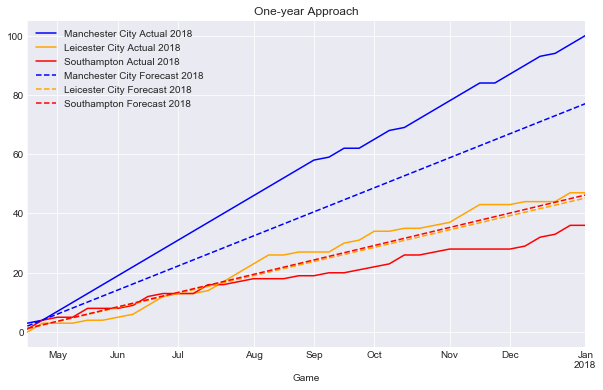

In [58]:
fig, ax4 = plt.subplots(figsize = (10, 6))

mc_ts18.plot(label='Manchester City Actual 2018', legend = True, color = 'b')
le_ts18.plot(label='Leicester City Actual 2018', legend = True, color = 'orange')
sc_ts18.plot(label='Southampton Actual 2018', legend = True, color = 'red')

drift11(mc_ts17, h=38).plot(label='Manchester City Forecast 2018', legend = True, color = 'b', ls = '--')
drift11(le_ts17, h=38).plot(label='Leicester City Forecast 2018', legend = True, color = 'orange', ls = '--')
drift11(sc_ts17, h=38).plot(label='Southampton Forecast 2018', legend = True, color = 'red', ls = '--' )
ax4.set_title('One-year Approach')

plt.show()

## Section 2.2.1: Forecast 2 - Using 2015 to 2017 data 

## Three-year approach using the average of 2015, 2016 and 2017 data
First, we find the average number of points for each game over the 3 years (2015-2017).

### Manchester City Football Club 3-year Record:

In [59]:
mc_ts15_reset = mc_ts15.copy()
mc_ts16_reset = mc_ts16.copy()
mc_ts17_reset = mc_ts17.copy()

mc_ts15_reset.index = mc_ts15.index
mc_ts16_reset.index = mc_ts15.index
mc_ts17_reset.index = mc_ts15.index
mc_ts15_16_17 = pd.concat([mc_ts15_reset, mc_ts16_reset, mc_ts17_reset], axis = 1)
mc_ts15_16_17['Average_Performance'] = (mc_ts15_reset + mc_ts16_reset + mc_ts17_reset)/3
mc_ts15_16_17 = mc_ts15_16_17['Average_Performance']
mc_ts15_16_17

Game
2014-08-03     3.000000
2014-08-10     6.000000
2014-08-17     8.000000
2014-08-24    10.333333
2014-08-31    12.666667
2014-09-07    14.666667
2014-09-14    15.666667
2014-09-21    18.000000
2014-09-28    19.333333
2014-10-05    21.666667
2014-10-12    23.333333
2014-10-19    25.666667
2014-10-26    27.666667
2014-11-02    29.666667
2014-11-09    30.666667
2014-11-16    33.666667
2014-11-23    35.666667
2014-11-30    38.666667
2014-12-07    39.333333
2014-12-14    42.333333
2014-12-21    43.000000
2014-12-28    44.333333
2015-01-04    46.000000
2015-01-11    48.333333
2015-01-18    50.333333
2015-01-25    52.333333
2015-02-01    52.666667
2015-02-08    55.000000
2015-02-15    55.666667
2015-02-22    56.666667
2015-03-01    58.666667
2015-03-08    60.666667
2015-03-15    63.000000
2015-03-22    64.666667
2015-03-29    67.666667
2015-04-05    69.666667
2015-04-12    72.000000
2015-04-19    74.333333
Freq: W-SUN, Name: Average_Performance, dtype: float64

### Leicester City Football Club 3-year Record:

In [60]:
le_ts15_reset = le_ts15.copy()
le_ts16_reset = le_ts16.copy()
le_ts17_reset = le_ts17.copy()

le_ts15_reset.index = le_ts15.index
le_ts16_reset.index = le_ts15.index
le_ts17_reset.index = le_ts15.index
le_ts15_16_17 = pd.concat([le_ts15_reset, le_ts16_reset, le_ts17_reset], axis = 1)
le_ts15_16_17['Average_Performance'] = (le_ts15_reset + le_ts16_reset + le_ts17_reset)/3
le_ts15_16_17 = le_ts15_16_17['Average_Performance']
le_ts15_16_17

Game
2014-08-03     1.333333
2014-08-10     2.666667
2014-08-17     4.333333
2014-08-24     5.666667
2014-08-31     8.666667
2014-09-07     9.000000
2014-09-14     9.666667
2014-09-21    10.666667
2014-09-28    12.000000
2014-10-05    13.333333
2014-10-12    14.333333
2014-10-19    15.666667
2014-10-26    17.000000
2014-11-02    17.333333
2014-11-09    19.333333
2014-11-16    20.333333
2014-11-23    21.666667
2014-11-30    21.666667
2014-12-07    24.000000
2014-12-14    25.000000
2014-12-21    27.000000
2014-12-28    27.333333
2015-01-04    28.333333
2015-01-11    29.333333
2015-01-18    30.333333
2015-01-25    31.666667
2015-02-01    33.666667
2015-02-08    35.333333
2015-02-15    37.333333
2015-02-22    40.333333
2015-03-01    42.333333
2015-03-08    44.666667
2015-03-15    46.666667
2015-03-22    48.000000
2015-03-29    51.000000
2015-04-05    52.333333
2015-04-12    53.666667
2015-04-19    55.333333
Freq: W-SUN, Name: Average_Performance, dtype: float64

### Southampton Football Club 3-year Record:

In [61]:
sc_ts15_reset = sc_ts15.copy()
sc_ts16_reset = sc_ts16.copy()
sc_ts17_reset = sc_ts17.copy()

sc_ts15_reset.index = sc_ts15.index
sc_ts16_reset.index = sc_ts15.index
sc_ts17_reset.index = sc_ts15.index
sc_ts15_16_17 = pd.concat([sc_ts15_reset, sc_ts16_reset, sc_ts17_reset], axis = 1)
sc_ts15_16_17['Average_Performance'] = (sc_ts15_reset + sc_ts16_reset + sc_ts17_reset)/3
sc_ts15_16_17 = sc_ts15_16_17['Average_Performance']
sc_ts15_16_17

Game
2014-08-03     0.666667
2014-08-10     1.000000
2014-08-17     2.666667
2014-08-24     4.666667
2014-08-31     7.000000
2014-09-07     9.000000
2014-09-14    10.333333
2014-09-21    13.333333
2014-09-28    15.000000
2014-10-05    16.333333
2014-10-12    18.333333
2014-10-19    20.000000
2014-10-26    21.000000
2014-11-02    21.000000
2014-11-09    22.333333
2014-11-16    22.666667
2014-11-23    24.666667
2014-11-30    26.666667
2014-12-07    27.000000
2014-12-14    28.000000
2014-12-21    30.000000
2014-12-28    33.000000
2015-01-04    34.000000
2015-01-11    35.333333
2015-01-18    37.666667
2015-01-25    39.666667
2015-02-01    39.666667
2015-02-08    41.000000
2015-02-15    42.666667
2015-02-22    45.666667
2015-03-01    46.666667
2015-03-08    47.666667
2015-03-15    49.000000
2015-03-22    50.000000
2015-03-29    51.000000
2015-04-05    53.000000
2015-04-12    55.333333
2015-04-19    56.333333
Freq: W-SUN, Name: Average_Performance, dtype: float64

In [62]:
mc_ts18_copy = mc_ts18.copy()
le_ts18_copy = le_ts18.copy()
sc_ts18_copy = sc_ts18.copy()

mc_ts18_copy.index = drift11(mc_ts15_16_17, h = 38).index
le_ts18_copy.index = drift11(le_ts15_16_17, h = 38).index
sc_ts18_copy.index = drift11(sc_ts15_16_17, h = 38).index
sc_ts18

Game
2017-04-23     1
2017-04-30     4
2017-05-07     5
2017-05-14     5
2017-05-21     8
2017-05-28     8
2017-06-04     8
2017-06-11     9
2017-06-18    12
2017-06-25    13
2017-07-02    13
2017-07-09    13
2017-07-16    16
2017-07-23    16
2017-07-30    17
2017-08-06    18
2017-08-13    18
2017-08-20    18
2017-08-27    19
2017-09-03    19
2017-09-10    20
2017-09-17    20
2017-09-24    21
2017-10-01    22
2017-10-08    23
2017-10-15    26
2017-10-22    26
2017-10-29    27
2017-11-05    28
2017-11-12    28
2017-11-19    28
2017-11-26    28
2017-12-03    28
2017-12-10    29
2017-12-17    32
2017-12-24    33
2017-12-31    36
2018-01-07    36
Freq: W-SUN, Name: Cumulative Points, dtype: int64

## Section 2.2.3: Forecast accuracy

### Prepare data for error accuracy
We concatenate the 2017 data with the 2018 data to see the continued form of each team in order to calculate the forecast error based on the discrepancies seen in the graphs above for Manchester City, Leicester City and Southampton, respectively.
We do the same for the 2015, 2016, 2017 and 2018 data, as shown side-by-side below:

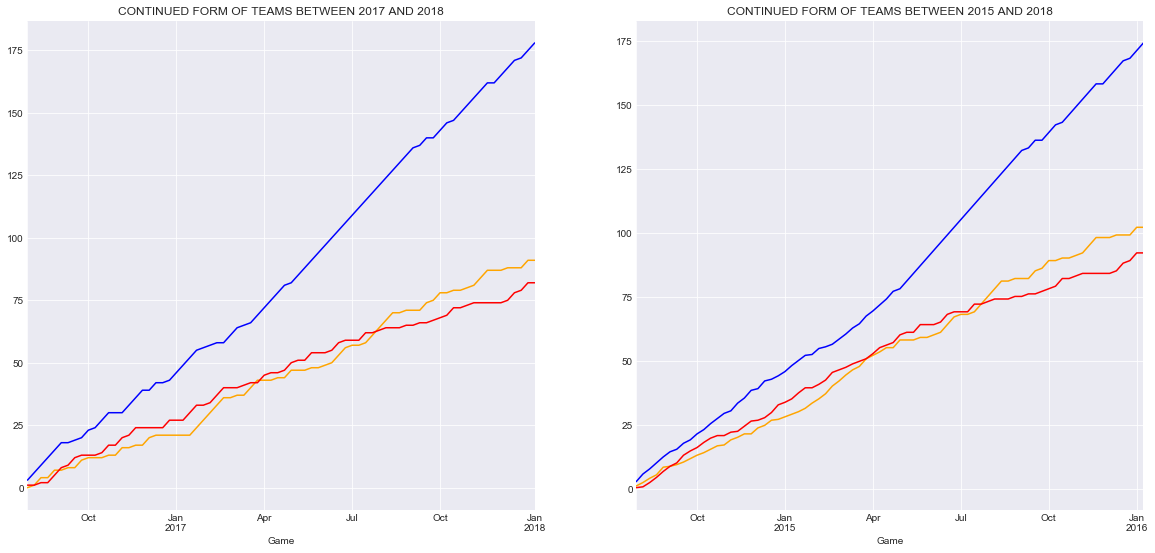

In [63]:
fig, ax = plt.subplots(1, 2, figsize = (20, 9))

# PERFORMANCE OVER 2 YEARS
mc_ts17_18 = pd.concat([mc_ts17,mc_ts17.values.T[-1] + mc_ts18])
mc_ts17_18.plot( color = 'b', ax = ax[0])

le_ts17_18 = pd.concat([le_ts17,le_ts17.values.T[-1] + le_ts18])
le_ts17_18.plot(color = 'orange', ax = ax[0])


sc_ts17_18 = pd.concat([sc_ts17,sc_ts17.values.T[-1] + sc_ts18])
sc_ts17_18.plot(color = 'red', ax = ax[0])
ax[0].set_title('CONTINUED FORM OF TEAMS BETWEEN 2017 AND 2018')

# PERFORMANCE OVER 4 YEARS
mc_ts15_16_17_18 = pd.concat([mc_ts15_16_17,mc_ts15_16_17.values.T[-1] + mc_ts18_copy])
mc_ts15_16_17_18.plot( color = 'b', ax = ax[1])

le_ts15_16_17_18 = pd.concat([le_ts15_16_17,le_ts15_16_17.values.T[-1] + le_ts18_copy])
le_ts15_16_17_18.plot(color = 'orange', ax = ax[1])


sc_ts15_16_17_18 = pd.concat([sc_ts15_16_17,sc_ts15_16_17.values.T[-1] + sc_ts18_copy])
sc_ts15_16_17_18.plot(color = 'red', ax = ax[1])
ax[1].set_title('CONTINUED FORM OF TEAMS BETWEEN 2015 AND 2018')
plt.show()


To compare the $One-year$ and $Three-year$ approach accuracies, we will plot again the different forecasts

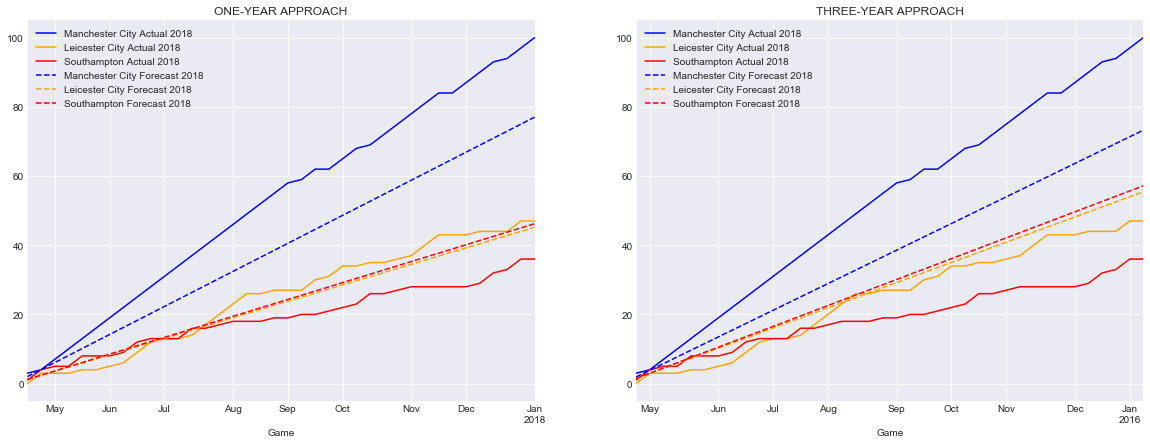

In [64]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))

#One-year
drift11(mc_ts17, h=38).index = mc_ts18.index
drift11(le_ts17, h=38).index = le_ts18.index
drift11(sc_ts17, h=38).index = sc_ts18.index
mc_ts18.plot(label='Manchester City Actual 2018', legend = True, color = 'b', ax = ax[0])
le_ts18.plot(label='Leicester City Actual 2018', legend = True, color = 'orange', ax = ax[0])
sc_ts18.plot(label='Southampton Actual 2018', legend = True, color = 'red', ax = ax[0])

drift11(mc_ts17, h=38).plot(label='Manchester City Forecast 2018', legend = True, color = 'b', ls = '--', ax = ax[0])
drift11(le_ts17, h=38).plot(label='Leicester City Forecast 2018', legend = True, color = 'orange', ls = '--', ax = ax[0])
drift11(sc_ts17, h=38).plot(label='Southampton Forecast 2018', legend = True, color = 'red', ls = '--', ax = ax[0] )
ax[0].set_title('ONE-YEAR APPROACH')

# Three-year
mc_ts18_copy.plot(label='Manchester City Actual 2018', legend = True, color = 'b', ax = ax[1])
le_ts18_copy.plot(label='Leicester City Actual 2018', legend = True, color = 'orange', ax = ax[1])
sc_ts18_copy.plot(label='Southampton Actual 2018', legend = True, color = 'red', ax = ax[1])

drift11(mc_ts15_16_17, h=38).plot(label='Manchester City Forecast 2018', legend = True, color = 'b', ls = '--', ax = ax[1])
drift11(le_ts15_16_17, h=38).plot(label='Leicester City Forecast 2018', legend = True, color = 'orange', ls = '--', ax = ax[1])
drift11(sc_ts15_16_17, h=38).plot(label='Southampton Forecast 2018', legend = True, color = 'red', ls = '--', ax = ax[1] )
ax[1].set_title('THREE-YEAR APPROACH')
# ax5.set_yticklabels(sc_ts18)
plt.show()



We may use any of evaluation from a collection of metrics to evaluate forecast approach accuracy. In the forecasts done in [Rob J Hyndman and George Athanasopoulos' Forecasting: Principles and Practice](https://otexts.org/fpp2/accuracy.html), a host of metrics are used to evaluate various methods, and it is shown that Mean Absolute Error, Mean Absolute Percentage Error, Mean Absolute Scaled Error (MASE) as well as Root Mean Squared Error produce consistent accuracies. However, [Hyndman and Koehler](A-note-on-the-MASE-Revision-for-IJF.pdf) recommend that MASE should become the standard when comparing forecast accuracies, regardless of the data type. 

We will not verify these claims by using different evaluation metrics and will use MASE regardless of the absence of seasonality in our data.

In [65]:
def mase(y_est, y, y_train, is_ts=True, is_seasonal=True):
    error = y - y_est
#     errorover = error/y.shape[0]
    q = error/((y_train-y_train.mean()).abs()).mean()
    MASE = q.abs().mean()
    return MASE
# error.abs().mean()

def drift(y, h):
    temp = [y.values.T[-1]+hi*(y.values.T[-1]-y.values.T[0])/(len(y)-1) for hi in range(1,h+1)]
    index = y.index.shift(h)[-h:]
    return pd.Series(temp, index=index)
mase_result = pd.DataFrame(index = ['Manchester City', 'Leicester City', 'Southampton'], columns=['One-year Error', 'Three-year Error'])

mase_result.loc[['Manchester City'],['One-year Error']] = mase(drift(mc_ts17,38), mc_ts17_18, mc_ts17,  is_seasonal=False)
mase_result.loc[['Leicester City'],['One-year Error']] = mase(drift(le_ts17,38), le_ts17_18, le_ts17,  is_seasonal=False)
mase_result.loc[['Southampton'],['One-year Error']] = mase(drift(sc_ts17,38), sc_ts17_18, sc_ts17,  is_seasonal=False)

mase_result.loc[['Manchester City'],['Three-year Error']] = mase(drift(mc_ts15_16_17,38), mc_ts15_16_17_18, mc_ts15_16_17,  is_seasonal=False)
mase_result.loc[['Leicester City'],['Three-year Error']] = mase(drift(le_ts15_16_17,38), le_ts15_16_17_18, le_ts15_16_17,  is_seasonal=False)
mase_result.loc[['Southampton'],['Three-year Error']] = mase(drift(sc_ts15_16_17,38), sc_ts15_16_17_18, sc_ts15_16_17,  is_seasonal=False)

mase_result

,One-year Error,Three-year Error
Manchester City,0.753443,0.878808
Leicester City,0.268585,0.273824
Southampton,0.42343,0.72631


Note that the aim of this comparison is not to measure the accuracy of a forecasting 'method', as defined in  [Hyndman and Koehler](A-note-on-the-MASE-Revision-for-IJF.pdf). 

Here, we only use the drift 'method' of forecasting. Instead, we seek to find the best 'approach' by answering the question: 

*How much data do we ought to use we use when trying to predict a team's performance?* That is, *Should we only consider performance from last year, or should we extend our data source to two, three, four years etc.?*  

Also, MASE is also useful in telling is what nature of team has easier predictions attatched to them.

From these tests, we have come up with the following analyses:

### Evaluation: Choosing the best approach


* The most accurate approach is the One-year approach since it exhibits the lowest $Mean Absolute Scaled Error$ on all teams tested

### Evaluation: Choosing the nature of a team

* The team for which the results are most accurate is the middle team (Leicester City) using both approaches.
* The team for which the results are least accurate is the top team (Manchester City) using both approaches.
* The team for which the results are fairly accurate is the bottom team (Southampton) using both approaches.


This leads is to suggest that the most consistent team in general is a team that is near the middle of the log, followed by teams nearer to the bottom of the log. By these measurements, this hypothesis is true using the previous year's performances, as well as the average performanve of the team over three years. 

That is, if a predictor would like to judge a team's performance over the following year, they are more likely to make an accurate prediction about a team that is at the middle or bottom of the log than they are to make for one that is near the top of the log since their performances are most concsistent.



##  Interpretation:
One may reason that the most important result of a forecast is its value at the last time point of the year. That is, it matters not the fluctuations in a teams performance, but the number of points it accumulated in that year. 

For what it's worth to a predictor, though, the MASE model of evaluation was used to measure the accuracy of forecasts. This may be useful if a predictor wants to predict where a team might be at any point in the year. We showed that it would be easier to do so as one moves towards a team in the centre of the log than in either direction.

## Section 2.2.4: Residuals

As a final step to evaluating forecasts, we plot an acf of residuals for the $One-year$ forecast only; since we wish to understand further how it fares against other tests.

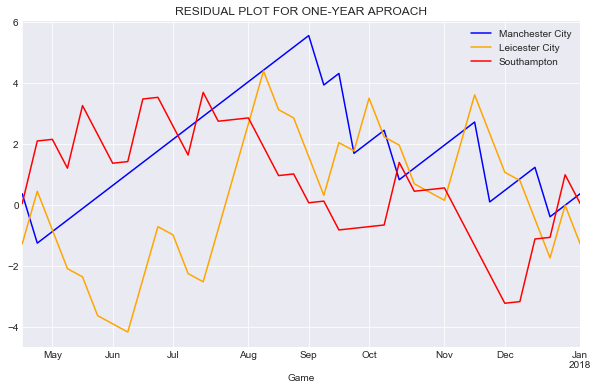

In [66]:
mc_drif = drift11(mc_ts18, h = 38).copy()
mc_drif.index = mc_ts18.index 
mc_residue = mc_ts18 - mc_drif
mc_residue.plot( figsize=(10,6), label = 'Manchester City', color = 'b')

le_drif = drift11(le_ts18, h = 38).copy()
le_drif.index = le_ts18.index 
le_residue = le_ts18 - le_drif
le_residue.plot( figsize=(10,6), label = 'Leicester City', color = 'orange')

sc_drif = drift11(sc_ts18, h = 38).copy()
sc_drif.index = sc_ts18.index 
sc_residue = sc_ts18 - sc_drif
sc_residue.plot(title='RESIDUAL PLOT FOR ONE-YEAR APROACH', figsize=(10,6), label = 'Southampton', color = 'r')
plt.legend(loc = 1)
plt.show()

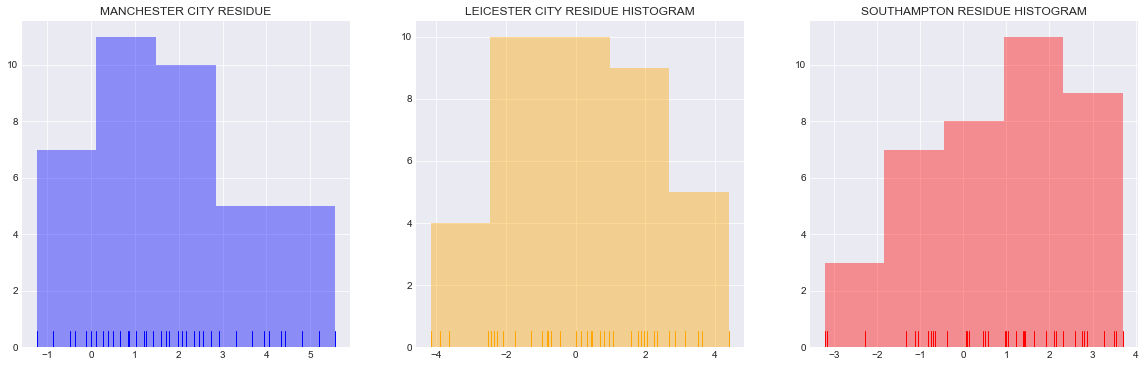

In [67]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
sns.distplot(mc_residue, kde=False, rug=True, ax = ax[0], color = 'b')
ax[0].set_title('MANCHESTER CITY RESIDUE')
sns.distplot(le_residue, kde=False, rug=True, ax = ax[1], color = 'orange')
ax[1].set_title('LEICESTER CITY RESIDUE HISTOGRAM')

sns.distplot(sc_residue, kde=False, rug=True, ax = ax[2], color = 'r')
ax[2].set_title('SOUTHAMPTON RESIDUE HISTOGRAM')
plt.show()

The residuals computed above are not normally distributed. This may suggest that our forecasts are  likely not accurate accurate for the 2018 year.

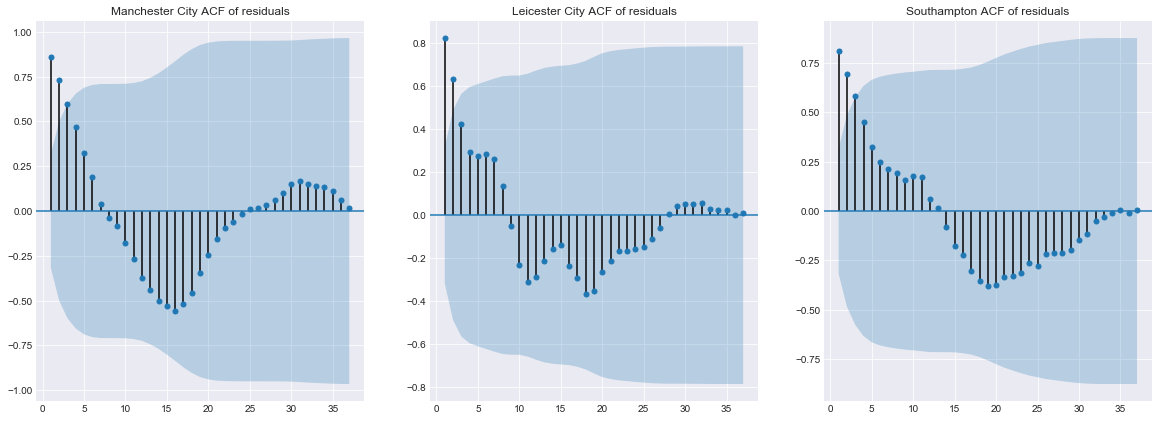

In [68]:
fig, ax = plt.subplots(1,3, figsize = (20, 7))
plot_acf(mc_residue, lags=37, zero = False, title='Manchester City ACF of residuals', ax = ax[0])
plot_acf(le_residue, lags=37, zero = False, title='Leicester City ACF of residuals', ax = ax[1])
plot_acf(sc_residue, lags=37, zero = False, title='Southampton ACF of residuals', ax = ax[2])
plt.show()

The partial autocorrelation function of residuals shows that if we control for shorter lagsThe residuals show insignificant ACF values; implying a lack of correlation between the residuals. This suggests that our One-year forecast model works quite well, too.

# FINAL CONCLUSION

All tests done in this report were aimed at helping the football community attain for themselves some developed perspectives when evaluating a player or team's performance. A series of tests were conducted in order to make the data used in this report useful to a reader.

**Chapter 1**

Discussed how a player's attribute strength rating could affect a team and it was concluded that if one such player is to make it, he is better off playing for a team where he is relatively better than his teammates. It stands to reason that his abilities would stand out. The contribution of this discussion to the aim of this report: 'How to approach risk in football?' is as follows: 

A player who plays for a team where he is better is likely to be scouted by a bigger club and therefore likelier to make a decent career - good news for those rooting for him. Conditions for helping a player get better were discussed

**Chapter 2**

Showcased three teams from the English Premier League - Manchester City, Leicester City, and Southampton. This was done to help determine where any of these teams may end up , via a forecast. The drift method was used, along with Mean Absolute Scaled Error to evaluate its accuracy. The contribution of this chapter to the aim of this report: 

Teams that display performances that place them near the middle of the log relative to the other teams are more consistent in terms of number of points accumulated ( this, however, does not imply that they will end up in a similar position) . Any predictor who would like to decide on a team take stake in should therefore consider such teams. Teams that are near the top or bottoms of the table on average each year are usually less predictable in terms of number of points accumulated.

Possible future ammendments to this project:

Given more data, more accurate forecasts can be made. Data such as:

* The strength of the player attributes
* Each team's coach's reputation and ability
* The country in which the team plays

Also, this project is not a short read; brevity may go some way in helping the reader reach a conclusion.

# REFERENCES

* Hyndman, Athanasopoulos: [Rob J Hyndman and George Athanasopoulos' Forecasting: Principles and Practice](https://otexts.org/fpp2/accuracy.html)

* Hyndman, Koehler: [Hyndman and Koehler](A-note-on-the-MASE-Revision-for-IJF.pdf). 

* Dr. Terence van Zyl: [FPP2.ipynb](FPP2.ipynb),  [FPP3.ipynb](FPP3.ipynb)

* [Research Gate: What_to_do_if_the_residuals_in_NR_are_not_normally_distributed ](https://www.researchgate.net/post/What_to_do_if_the_residuals_in_NR_are_not_normally_distributed)

* [docs.scipy.org](https://docs.scipy.org)

* [matplotlib.org](https://matplotlib.org)